# Notebook: Trabajo Final de Inteligencia Artificial "Cloud Infrastructure Anomaly Detection" (Detección de Anomalías en Infraestructura en la Nube)
Autores: Breiner Gonzalez Machado<sup>1</sup>, Martín Pallares Páez<sup>1</sup>, Luis Miguel Toscano<sup>1</sup>
<br>
<sup>[1]</sup> Programa de Ingeniería de Sistemas, Facultad de Ingeniería, Universidad del Magdalena

El presente notebook presenta el proceso y desarrollo del trabajo final del curso de Inteligencia Artificial para el Programa de Ingeniería de Sistemas en la Universidad del Magdalena en el periodo académico 2025-2, en el que se entrenan algunos modelos de aprendizaje de máquina supervisado sobre el conjunto de datos (dataset) asignado para la puesta en acción del presente ejercicio, llamado "Cloud Infrastructure Anomaly Detection" (Datos para la detección de anomalías en la infraestructura de la nube) de Sandhya Peesara y disponible en Kaggle siguiendo el enlace: https://www.kaggle.com/datasets/sandhyapeesara/cloud-anomaly-data


## I. Descripción del Problema e Inspección del Conjunto de Datos

### 1. Descripción del Problema

En la computación en la nube, miles de máquinas virtuales (VMs) ejecutan servicios y aplicaciones que requieren alta disponibilidad, estabilidad y seguridad. Sin embargo, durante sus operaciones pueden presentarse anomalías debido a sobrecarga de recursos, fallos de hardware, errores de configuración, comportamientos inesperados de procesos o ciberataques. La detección temprana de estas anomalías es esencial para prevenir caídas prolongadas, pérdida de datos, disminución del rendimiento y costos operativos elevados.

La detección manual es inviable, debido al volumen y la velocidad con la que se generan métricas en sistemas distribuidos. Por esta razón, se emplean métodos de aprendizaje automático, que permiten identificar patrones normales y reconocer desviaciones significativas que correspondan a comportamientos anómalos. De acuerdo con Chandola, Banerjee y Kumar (2009), la detección de anomalías es una tarea clave en la supervisión de sistemas donde el comportamiento esperado puede ser modelado a partir de datos históricos.

El conjunto de datos utilizado en este proyecto proviene del repositorio de Kaggle **“Cloud Infrastructure Anomaly Detection Data”**, publicado por Sandhya Peesara en su última versión actualizada en 2025. El dataset contiene registros de comportamiento operativo de varias máquinas virtuales, junto con una etiqueta denominada **“Anomaly status”**, que clasifica los registros como:

- **0 → Normal**
- **1 → Anómalo**

Por lo tanto, nuestro problema corresponde a una **tarea de clasificación supervisada**, donde el objetivo es entrenar modelos capaces de **predecir si el estado de una VM es normal o anómalo** utilizando sus métricas de rendimiento como variables predictoras.

#### Sobre el Dataset

El dataset se encuentra en el archivo `Cloud_Anomaly_Dataset.csv`. Este conjunto de datos, contiene información operacional medida en diferentes puntos del tiempo de múltiples máquinas virtuales para la fiabilidad y la detección de fallos. Las variables que este dataset proporciona son:

| Variable | Tipo | Descripción |
|--------|------|-------------|
| `vm_id` | Categórica | Identificador único de la máquina virtual. |
| `timestamp` | Tiempo | Marca temporal del registro de métricas. |
| `cpu_usage` | Numérica (%) | Porcentaje de uso del procesador. |
| `memory_usage` | Numérica (%) | Uso de memoria RAM. |
| `network_traffic` | Numérica (bytes/s) | Tráfico de red generado. |
| `power_consumption` | Numérica (W) | Consumo energético. |
| `num_executed_instructions` | Numérica | Número de instrucciones ejecutadas. |
| `execution_time` | Numérica (s) | Tiempo de ejecución de la tarea. |
| `energy_efficiency` | Numérica | Relación entre trabajo y energía consumida. |
| `task_type` | Categórica | Tipo de tarea (`compute`, `network`, `io`, etc.). |
| `task_priority` | Categórica | Prioridad de la tarea (`low`, `medium`, `high`). |
| `task_status` | Categórica | Estado de ejecución (`running`, `completed`, etc.). |
| **`Anomaly status`** | Binaria (0/1) | Etiqueta objetivo del modelo. |

*Observaciones preliminares:*

- A simple vista se observa la existencia de algunos valores faltantes en múltiples columnas, por lo que será necesario analizar y decidir que técnicas o metodologías amplicar para preparar correctamente los datos antes del entrenamiento de los modelos.
- A primeras impresiones se puede intuir que el dataset está fuertemente desbalanceado, con predominancia de registros etiquetados como **normales (0)** sobre **anómalos (1)**. Este desbalance afecta directamente el rendimiento de clasificadores tradicionales (He & Garcia, 2009), por lo que se pueden evaluar técnicas como:
  - Rebalanceo mediante Oversampling (SMOTE)
  - Undersampling
  - Ajuste de pesos de clase al entrenar los modelos

#### Objetivo General

> El objetivo general de este proyecto es analizar, preprocesar y utilizar el conjunto de datos para entrenar y comparar modelos de aprendizaje supervisado que permitan clasificar si el comportamiento de una máquina virtual es normal o anómalo. Se evaluarán modelos basados en regresión, árboles de decisión, Random Forest y redes neuronales (MLP y DNN), comparando su desempeño mediante métricas como *accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC.*

#### Objetivos Específicos

1. Explorar y analizar el conjunto de datos, identificando la distribución de las variables, la presencia de valores faltantes, patrones en las métricas de rendimiento y el grado de desbalance en la variable objetivo (*Anomaly status*).

2. Realizar el preprocesamiento del dataset, aplicando técnicas de limpieza de datos, imputación de valores faltantes, transformación de variables categóricas y normalización/estandarización cuando sea necesario.

3. Aplicar estrategias para tratar el desbalance de clases, evaluando técnicas como *oversampling* (por ejemplo, SMOTE), *undersampling* o el ajuste de pesos de clase en los modelos supervisados.

4. Entrenar y ajustar modelos de aprendizaje supervisado (regresión multivariada, árbol de decisión, Random Forest, MLP y DNN), empleando validación cruzada y búsqueda de hiperparámetros mediante *GridSearchCV*.

5. Evaluar el desempeño de los modelos entrenados utilizando métricas de clasificación apropiadas como *accuracy*, *precision*, *recall*, *F1-score*, *matriz de confusión* y *AUC-ROC*, analizando su capacidad para identificar correctamente estados anómalos.

6. Comparar los resultados obtenidos entre los distintos modelos, identificando fortalezas y debilidades de cada enfoque, así como las condiciones bajo las cuales presentan mejor desempeño.

7. Elaborar conclusiones y recomendaciones sobre el modelo más adecuado para la detección de anomalías en máquinas virtuales en la nube, indicando posibles líneas de trabajo futuro orientadas a mejorar la precisión, estabilidad o aplicabilidad del sistema.

### 2. Inspección del Conjunto de Datos

**2.1. Importación de las Librerías**

Para comenzar con la inspección y análisis del conjunto de datos, es necesario importar algunas librerías, para el procesamiento del dataset en un DataFrame usaremos `pandas`, `numpy` para algunas funciones útiles, y `matplotlib` y `seaborn` para la visualización de gráficas.

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
    classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel, RFE, SelectKBest, chi2, mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

**2.2. Configuración de Gráficos**

Para vizualizar correctamente los graficos definimos la función `set_graph_style` para configurar las librerías de `matplotlib` y `seaborn` y asegurar un estilo prolijo y consistente en los diferentes graficos que se generarán dentro de este notebook a continuación.

In [121]:
# Configuración de gráficos
%matplotlib inline
def set_graph_style():
    
    # Estilo base Seaborn
    sns.set(
        style="darkgrid",
        context="talk",
        palette="Set2"
    )

    # Ajustes de Matplotlib
    plt.rcParams.update({
        # Líneas y bordes
        'lines.linewidth': 1,
        'axes.linewidth': 1,
        'patch.linewidth': 1,
        'grid.linewidth': 1,
        
        # Colores y cuadrícula
        'axes.edgecolor': 'black',
        'grid.color': 'black',
        'grid.alpha': .1,
        'patch.edgecolor': 'black',
        
        # Texto y etiquetas
        'text.color': 'black',
        'axes.labelcolor': 'black',
        'xtick.color': 'black',
        'ytick.color': 'black',
        'font.size': 12,
        'font.family': 'sans-serif',
        'font.sans-serif': ['DejaVu Sans', 'Arial', 'Liberation Sans'],

        # Tamaños de ticks
        'xtick.major.size': 5,
        'ytick.major.size': 5,
    })

set_graph_style()

**2.3. Cargando el DataSet**

Ahora es imprescindible cargar el dataset `Cloud_Anomaly_Dataset.csv` en un DataFrame, aquí denominado `df` haciendo uso de la función `.read_csv()` de la librería pandas. Y para tener una vista priliminar de los datos cargados en crudo mostramos las primeras filas con la adición de la función `.head()` pasando como parametro el número `20` que indica el número de filas a mostrar con el fin de explorar de manera cruda algunos datos y partir con una idea de cómo se ven y qué pueden representar cada columna de nuestro conjunto de datos a trabajar.

In [122]:
# Cargar el dataset
df = pd.read_csv("Cloud_Anomaly_Dataset.csv")

# Mostrar las primeras filas
df.head(20)

vm_id         timestamp  cpu_usage  \
0   c5215826-6237-4a33-9312-72c1df909881  25-01-2023 09:10  54.881350   
1   29690bc6-1f34-403b-b509-a1ecb1834fb8  26-01-2023 04:46  71.518937   
2   2e55abc3-5bad-46cb-b445-a577f5e9bf2a  13-01-2023 23:39        NaN   
3   ea8455b0-251c-4470-b7ea-8d40476e3434  14-01-2023 19:59  79.172504   
4   fd28310b-be6f-4320-a664-de02274993d9  18-01-2023 11:22  87.001215   
5   d8556493-5092-46ea-9477-fb7a722b215e  15-01-2023 06:40  61.693400   
6   6f8b5688-ac95-4369-b552-6938fe3c2baa  24-01-2023 15:43  43.703195   
7   aaa03097-d35c-44cc-af28-08ac4a8ac005  15-01-2023 21:12  67.063787   
8   6b6d4ad7-615b-4aeb-be4e-002fb053850e  21-01-2023 13:38  12.892630   
9   1419b321-a100-46de-a38d-0a7a14e510e2  19-01-2023 04:41  83.794491   
10  e498a339-3f0f-4e72-b979-69dc40010f20  01-01-2023 11:30   9.609841   
11  1d3648b9-98c4-4280-97e8-4b3882b9e8db  29-01-2023 03:34  46.865120   
12  6515f29e-3770-439e-ad51-c898a2ee4c91  08-01-2023 14:29  97.676109   
13                                   NaN  14-01-2023 09:39   3.918779   
14  f8c40a51-3d53-4e27-94c5-f20681892369  11-01-2023 02:02  28.280696   
15  ddbd9bc0-df49-4c6f-800d-f24e5eae6160  27-01-2023 21:53  82.894003   
16  57f1377e-0fb3-424b-ab60-a0dd2a26050d  10-01-2023 11:22  24.875314   
17  b3b85134-a6a6-4e72-9ea2-3acbb9142b84  14-01-2023 22:18  44.712538   
18  d60bbb59-6b2f-4ea2-9145-ccc60bf52bba  30-01-2023 00:00  84.640867   
19  413a5a96-a794-484b-9a2e-41e15493742c  27-01-2023 23:04   1.919320   

    memory_usage  network_traffic  power_consumption  \
0      78.950861       164.775973         287.808986   
1      29.901883              NaN         362.273569   
2      92.709195       203.674847         231.467903   
3       2.972252       926.374030         173.559325   
4      46.620176       437.188115          77.054702   
5       0.665019       686.374706         154.891172   
6      28.118220              NaN         448.020527   
7      56.200805       856.372924         300.816338   
8            NaN       906.808046         330.207842   
9      18.781377       347.694315         395.090687   
10      5.842704       195.366922         153.257058   
11           NaN       257.221782          28.801594   
12           NaN       334.305574         105.053961   
13     46.181720       664.615565                NaN   
14     22.566771        29.166957         394.801524   
15     87.019231       542.554835         178.856362   
16     69.984631       668.823780         346.472355   
17     11.453808       617.043847         286.916373   
18     33.087739       994.937862         447.198748   
19     89.602372       653.398910           1.105498   

    num_executed_instructions  execution_time  energy_efficiency task_type  \
0                      7527.0       69.345575           0.553589   network   
1                      5348.0       41.396040           0.349856        io   
2                      5483.0       24.602549           0.796277        io   
3                      8644.0       55.702673           0.779499   compute   
4                      9427.0             NaN           0.207164       NaN   
5                      6006.0       99.542059           0.992291   compute   
6                      4628.0       81.336898           0.540977        io   
7                      3925.0        1.625046           0.979356        io   
8                      6940.0       14.172431           0.123155        io   
9                         NaN       29.873152           0.361522   network   
10                     2617.0       99.876272           0.458982   network   
11                     8737.0        3.849594           0.617357   compute   
12                      912.0             NaN           0.440746        io   
13                     5294.0       72.131794           0.092404        io   
14                     5677.0       15.922834           0.980112       NaN   
15                       25.0       77.960196           0.519331        io  

Con estos primeros registros del dataset podemos apreciar la naturaleza del conjunto de datos: 

- `vm_id` como identificador de la maquina virtual de la que proviene el registro con lo que parece un tipo de UUID.
- Una columna con temporalidad `timestamp` que deberemos evaluar para determinar si exite o no relación en tanto a la incidencia de anomalías en periodos temporales específicos.
- La precencia de posibles variables predictoras numéricas `cpu_usage`, `memory_usage`, `network_traffic`, `power_consumption`, `num_executed_instructions`, `execution_time`, `energy_efficiency` con valores aparentemente flotantes y que deberemos escalar en la siguiente sección del notebook. 
- De posibles variables predictoras categóricas `task_type`, `task_priority`, `task_status` que consideraremos convertirlas/codificarlas a variables numéricas según su naturaleza nominal u ordinal, aspecto que también determinaremos más adelante en este notebook.
- Algunos detalles con respecto a la calidad de los ejemplos y que deberemos verificar con informes y gráficas para poderiormente aplicar algunos mecanismos para ser corregidos como lo son en los datos faltantes de alguno de los registros para una o más variables aquí descritas.
- Una variable binaria a predecir, denominada como `Anomaly status` ya que el conjunto de datos consiste de dos clases etiquetadas como 0 para rendimiento de maquinas virtual con un estado normal, y 1 para rendimiento de maquinas virtuales que presentan alguna anomalía.

**2.4. Informe del DataSet**

Para más detalles y confirmar lo visto y supuesto en los items descritos y analizados anteriomente con los primeros registros, se hace necesario generar un informe sobre el contenido del archivo completo cargado en el DataFrame anterior, y para lograrlo, hacemos uso de la función `.info()` también de la librería pandas, e imprimimos el resultado.

In [265]:
# Generar informe de los datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277570 entries, 0 to 277569
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   vm_id                      249595 non-null  object 
 1   timestamp                  277570 non-null  object 
 2   cpu_usage                  250130 non-null  float64
 3   memory_usage               249775 non-null  float64
 4   network_traffic            249725 non-null  float64
 5   power_consumption          250018 non-null  float64
 6   num_executed_instructions  249637 non-null  float64
 7   execution_time             249960 non-null  float64
 8   energy_efficiency          249616 non-null  float64
 9   task_type                  249580 non-null  object 
 10  task_priority              249674 non-null  object 
 11  task_status                249621 non-null  object 
 12  Anomaly status             277570 non-null  int64  
dtypes: float64(7), int64(1), obje

Con este informe, ahora, sabemos con certeza que el conjunto de datos cuenta con exactamente **277,570 registros** y **13 columnas**, lo cual indica que se trata de un dataset de tamaño relativamente considerable y que es adecuado para entrenar modelos de aprendizaje supervisado. Y confirmamos lo supuesto en la visualización preliminar:

- Variables numéricas **(7)**: `cpu_usage`, `memory_usage`, `network_traffic`, `power_consumption`, `num_executed_instructions`, `execution_time`, `energy_efficiency`.
- Variables categóricas **(4)**: `task_type`, `task_priority`, `task_status`, `vm_id`.
- Variable temporal **(1)**: `timestamp`.
- Variable objetivo **(1)**: `Anomaly status`.

Se observa que varias columnas presentan valores faltantes, particularmente las relativas a métricas operacionales y características de tareas. Por ejemplo, columnas como `vm_id`, `memory_usage`, `network_traffic`, `num_executed_instructions` y `task_status` no contienen el 100% de sus valores. Esto indica la necesidad que tenemos de aplicar técnicas de imputación de datos durante la fase de preparación, para lo cual podremos incluir estrategias como la imputación por media, mediana o modelos específicos según el comportamiento de cada variable.

La variable `timestamp` se encuentra en formato de texto (`object`), y para realizar el análisis más avanzados de generación de variables de tendencia será necesario convertirla al tipo `datetime`.

La columna `Anomaly status`, que representa la variable a predecir, no presenta valores faltantes y es de tipo entero, lo que confirma que se trata de un problema de clasificación.

En este sentido, hasta este punto para la fase de preparación de los datos tenemos que:
- Será necesario tratar valores faltantes en múltiples columnas.
- Las variables categóricas deberán ser codificadas numéricamente para poder ser utilizadas por los modelos de aprendizaje supervisado respetando su denominación nominal u ordinal.
- La variable temporal requerirá conversión y extracción de características y decidir si serán útiles.

**2.5. Resumen Estadístico del DataSet**

Ahora, generar un resumen estadístico de las variables numéricas del conjunto de datos con la función `.describe()` será de utilidad para detectar posibles errores en los datos de las variables numéricas.

In [266]:
# Generar el resumen estadístico
df.describe().T

count         mean          std       min  \
cpu_usage                  250130.0    50.013258    28.895806  0.000071   
memory_usage               249775.0    49.967249    28.879090  0.000016   
network_traffic            249725.0   500.554083   288.787794  0.002542   
power_consumption          250018.0   249.987238   144.662676  0.000802   
num_executed_instructions  249637.0  5002.490284  2882.806422  0.000000   
execution_time             249960.0    50.011964    28.837634  0.000172   
energy_efficiency          249616.0     0.500369     0.288547  0.000004   
Anomaly status             277570.0     0.059999     0.237486  0.000000   

                                   25%          50%          75%          max  
cpu_usage                    24.880023    50.023806    75.097896    99.999171  
memory_usage                 24.965105    49.912051    74.960052    99.999907  
network_traffic             250.298114   500.736963   750.720026   999.998686  
power_consumption           124.199907   250.397212   375.485305   499.998819  
num_executed_instructions  2506.000000  5000.000000  7499.000000  9999.000000  
execution_time               25.098016    50.005593    75.043715    99.998831  
energy_efficiency             0.250375     0.500834     0.750112     0.999994  
Anomaly status                0.000000     0.000000     0.000000     1.000000

En este análisis descriptivo del conjunto de datos podemos observar una distribución relativamente equilibrada de las variables predictoras, sus medias están centradas muy cerca de los puntos medios, y los cuartiles están distribuidos de manera muy uniforme a lo largo de sus rangos con los extremos `min` y `max` de cada variable, por ejemplo, `cpu_usage` va de 0 a 100 con una media de 50 y cuartiles espaciados muy cerca del valor de cada porcentaje representativo. No se evidencia presencia de valores atípicos que consideremos relevantes. Las métricas de rendimiento del sistema, como el `cpu_usage`, `memory_usage`, `network_traffic` y `power_consumption`, presentan una variabilidad esperable y coherente entre sí, y en especial, para la `energy_efficiency` muestra valores normalizados, lo que nos sugiere una adecuada estandarización de los datos.

**2.6. Distribución de las Clases**

Es relevante hacer una inspeccion gráfica que pueda ser aún más diciente. Primero sobre la distribución de las clases de `Anomaly status` a través de un histograma, y segundo, de la representatividad mediante una diagrama de torta para validar el nivel de balanceo del conjunto de datos.

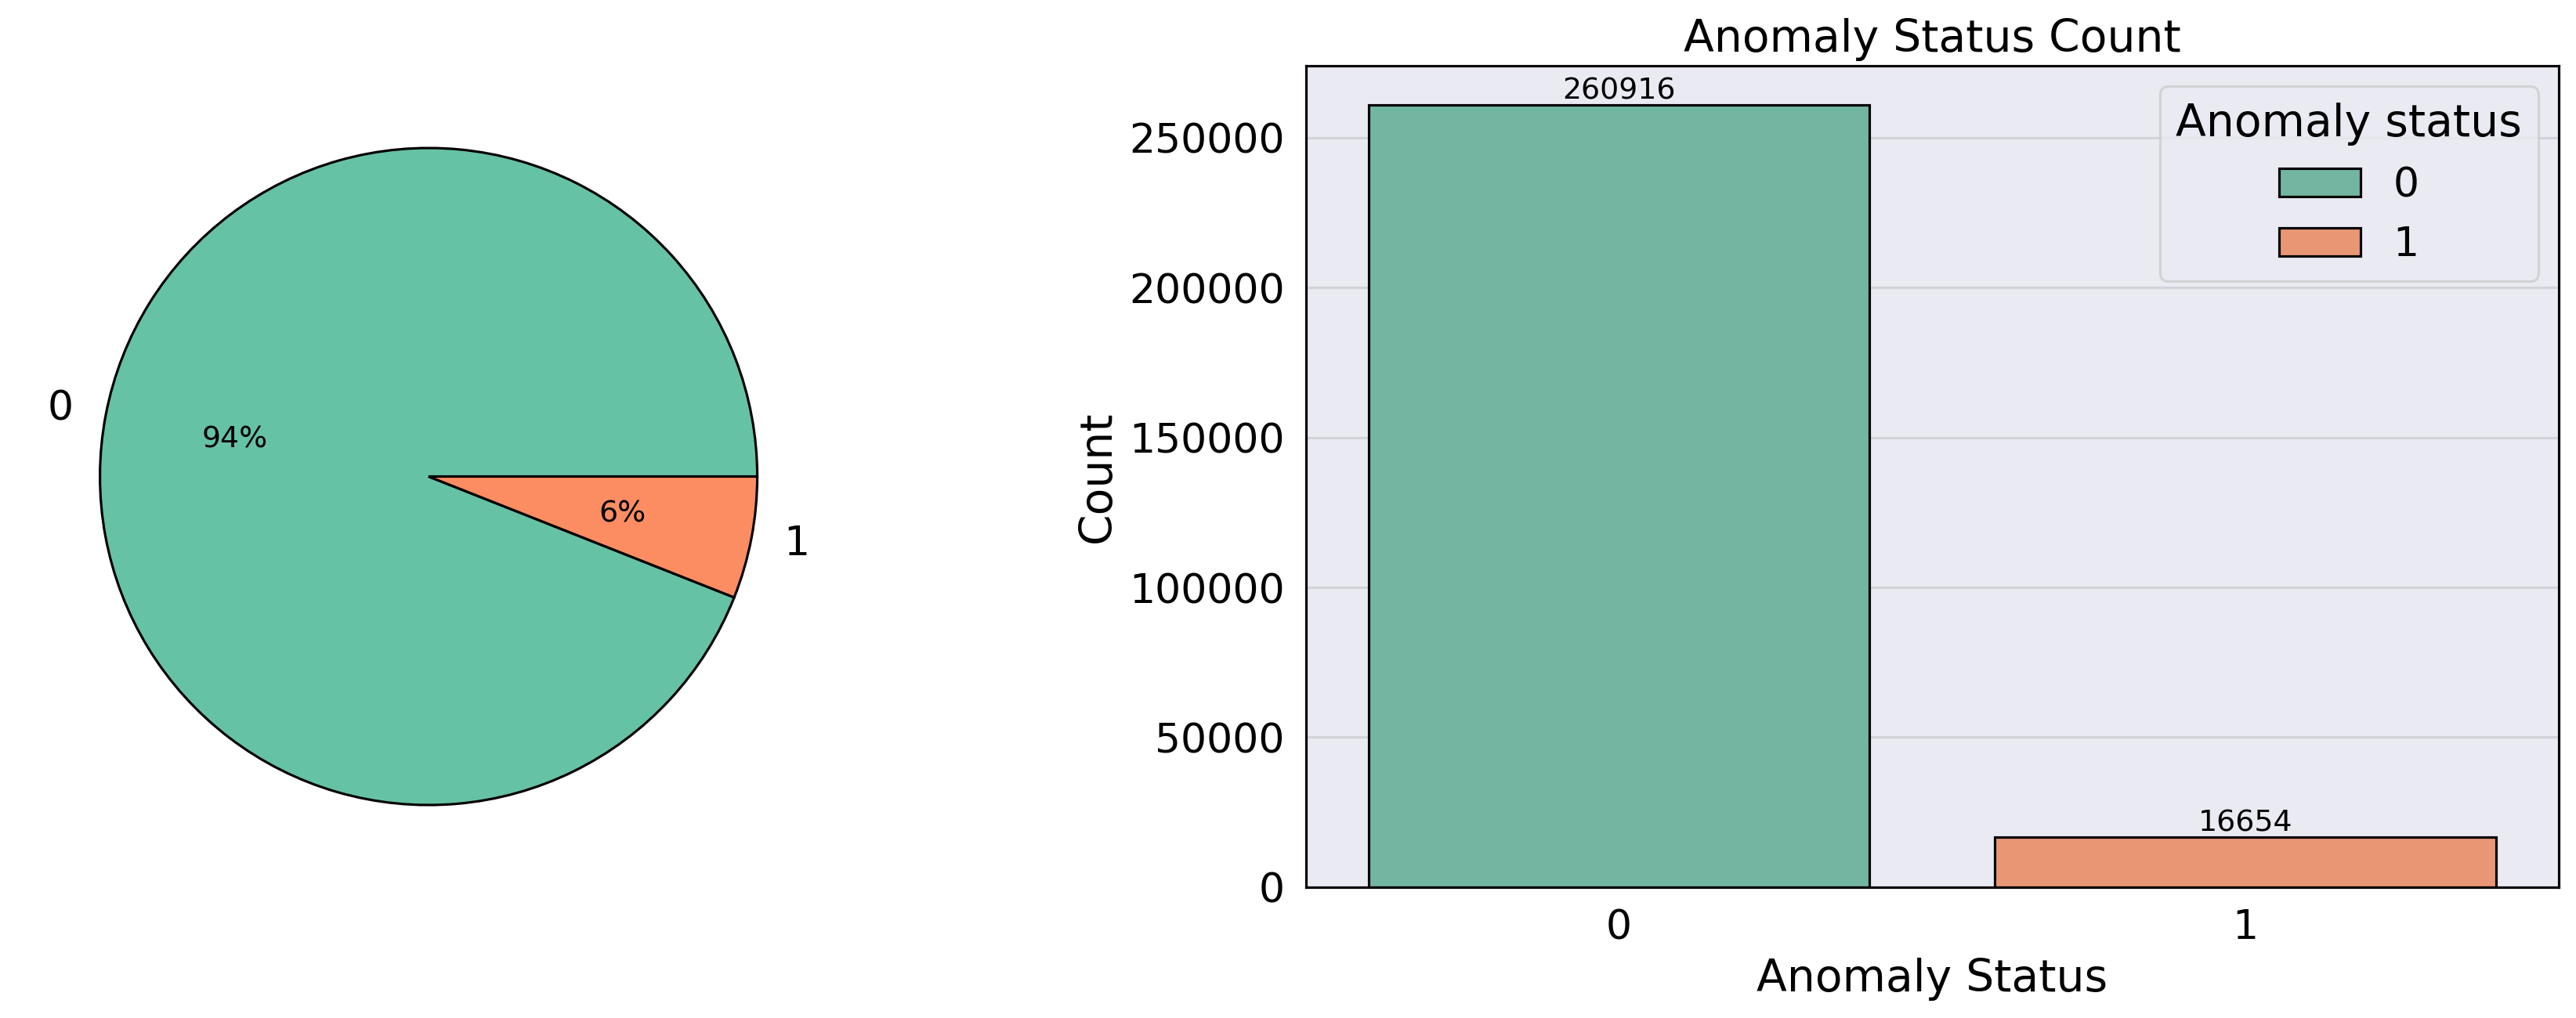

In [192]:
# Histograma y diagrama de torta del atributo clase
labels = df['Anomaly status'].unique()
dist = (df['Anomaly status'].value_counts()).to_numpy()

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(dist, labels = labels, autopct='%1.0f%%')
plt.subplot(1, 2, 2)
ax = sns.countplot(x = 'Anomaly status', hue = 'Anomaly status', data = df)

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Anomaly Status')
plt.ylabel('Count')
plt.title("Anomaly Status Count")
plt.show()

Al observar las gráficas de la variable `Anomaly status`, se confirma la sospecha preliminar ya que se nota claramente que el conjunto de datos está fuertemente desbalanceado. La gran mayoría de los registros, que son alrededor del 94%, corresponden a un funcionamiento normal del sistema (0), mientras que solo un 6% reflejan situaciones anómalas (1).

Este resultado nos hace sentido si consideramos que, en un entorno real de infraestructura en la nube, los eventos anómalos suelen ser poco comunes frente a la gran cantidad de operaciones normales que ocurren constantemente. Sin embargo, este desbalance en el dataset representa un reto para los modelos de detección que entrenaremos más adelante, ya que podrían aprender con mayor facilidad a reconocer los casos normales y pasar por alto las anomalías. Por ello, será importante aplicar alguna estrategia de balanceo o utilizar métricas de evaluación adecuadas que reflejen correctamente el rendimiento del modelo en la detección de estos casos minoritarios.

**2.7. Distribución de las Variables Predictoras Numéricas**

Para ampliar la inspección gráfica, generaremos un histograma y adicionalmente un gráfico de cajas y bigotes para visualizar la distribución de cada una de las variables numéricas del conjunto de datos.

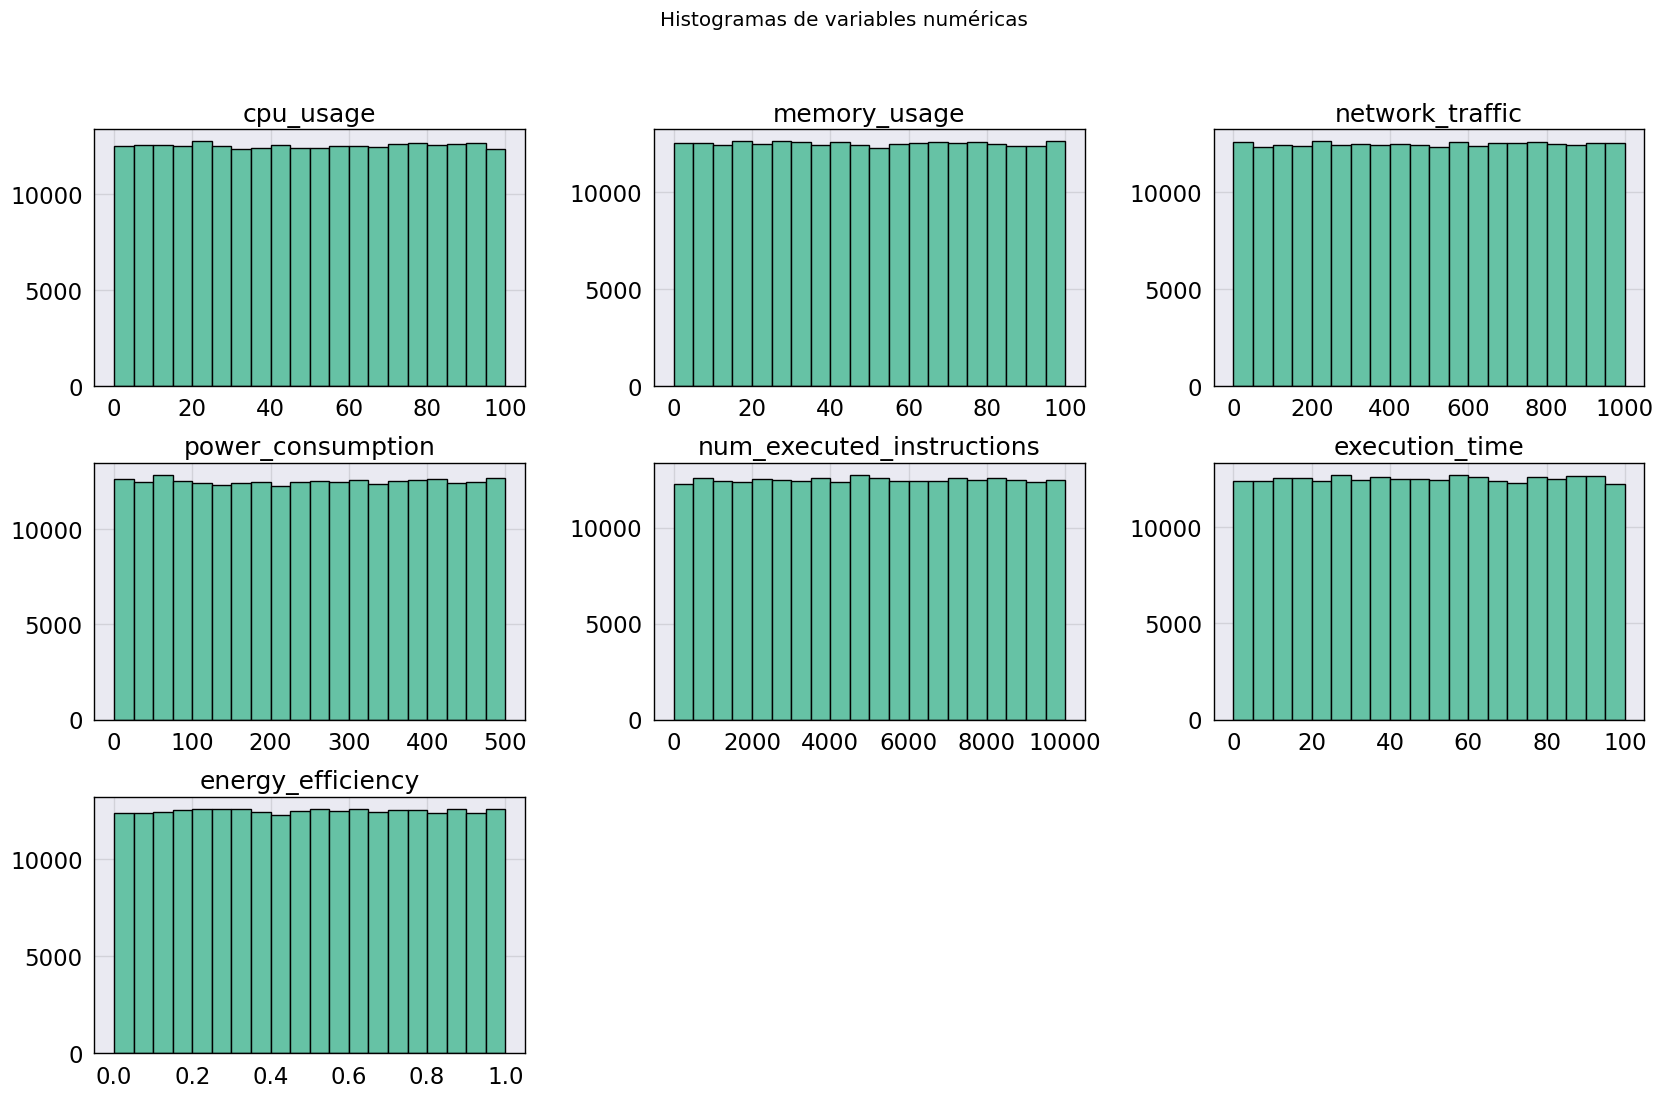

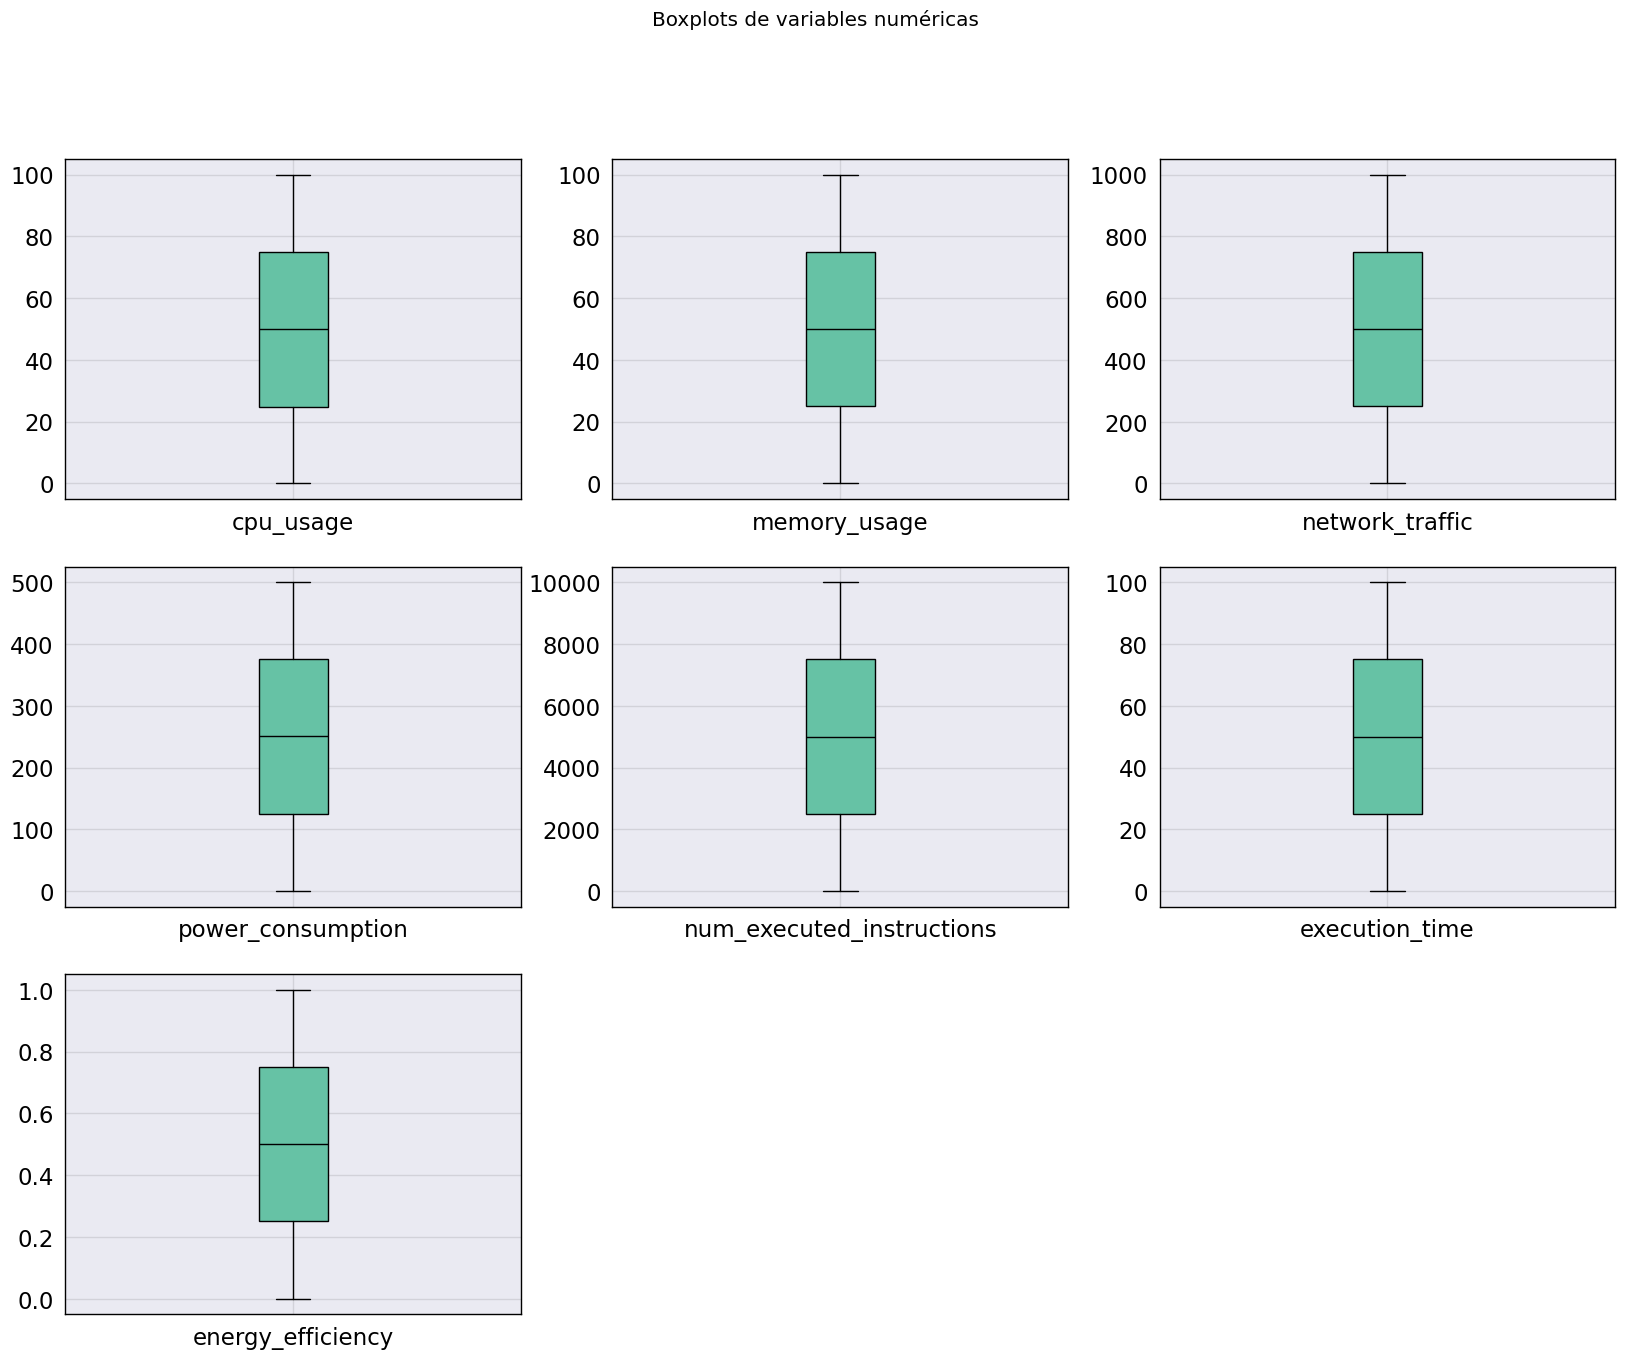

In [195]:
# Histogramas por variable numérica
numerical_predictors = df.dropna().drop(['Anomaly status'], axis=1).select_dtypes(include=['int64','float64']).columns.tolist()

df[numerical_predictors].hist(figsize=(20,12), bins=20)
plt.suptitle("Histogramas de variables numéricas")
plt.show()

# Boxplot por variable numérica
df[numerical_predictors].plot.box(
    subplots=True, 
    layout=(3, 3),
    figsize=(20, 15),
    sharey=False,
    title="Boxplots de variables numéricas",
    patch_artist=True,
    boxprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="black"),
)
plt.show()

Al analizar los gráficos de los histogramas y de cajas y bigotes de cada una de las variables numéricas, podemos observar una distribución aproximadamente uniforme en todas las métricas del sistema, como el uso de CPU, memoria, tráfico de red, consumo de energía, tiempo de ejecución, eficiencia energética y número de instrucciones ejecutadas. Esto indica que los valores de estas variables se encuentran distribuidos de manera homogénea a lo largo de sus rangos, sin concentraciones o picos significativos en zonas específicas. Esta uniformidad sugiere que los datos del dataset original fueron preprocesados o generados artificialmente con el fin de mantener una cobertura completa de posibles estados operativos del sistema, más que representar mediciones naturales capturadas en un entorno real. En consecuencia, no se aprecian sesgos, valores atípicos ni tendencias evidentes, lo que facilita el trabajo de normalización y entrenamiento de modelos, aunque también puede limitar la detección de patrones no lineales si el comportamiento del sistema es demasiado idealizado.

**2.8. Inspección de Valores Faltantes**

En este punto, es muy importante conocer los valores faltantes por cada una de las variables, y muy importante, por cada clase de nuestra variable predictora `Anomaly status`. debido a que el fuerte desbalanceo del dataset, confirmado con anterioridad, nos obliga a ser especialmente cuidadosos con la clase minoritaria de anomalías (1). Para ello, usamos algunas funciones de las librería pandas, y visualizamos algunos gráficos con matplotlib.

Resumen de valores faltantes y no faltantes por clase de 'Anomaly status':


Clase 0 (Normal):
                           Valores no faltantes  Valores faltantes  Total registros
vm_id                                    234646              26270           260916
timestamp                                260916                  0           260916
cpu_usage                                235836              25080           260916
memory_usage                             234719              26197           260916
network_traffic                          234680              26236           260916
power_consumption                        234986              25930           260916
num_executed_instructions                234641              26275           260916
execution_time                           235745              25171           260916
energy_efficiency                        233528              27388           260916
task_type                                234674              2624

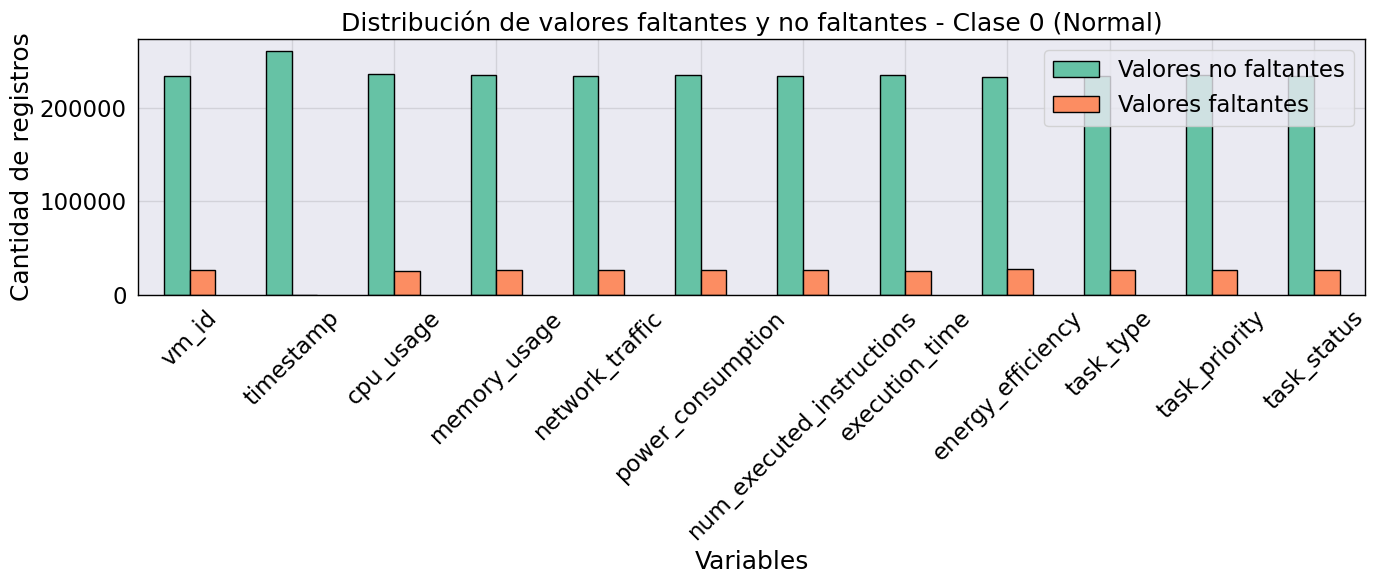


Clase 1 (Anómalo):
                           Valores no faltantes  Valores faltantes  Total registros
vm_id                                     14949               1705            16654
timestamp                                 16654                  0            16654
cpu_usage                                 14294               2360            16654
memory_usage                              15056               1598            16654
network_traffic                           15045               1609            16654
power_consumption                         15032               1622            16654
num_executed_instructions                 14996               1658            16654
execution_time                            14215               2439            16654
energy_efficiency                         16088                566            16654
task_type                                 14906               1748            16654
task_priority                             14972         

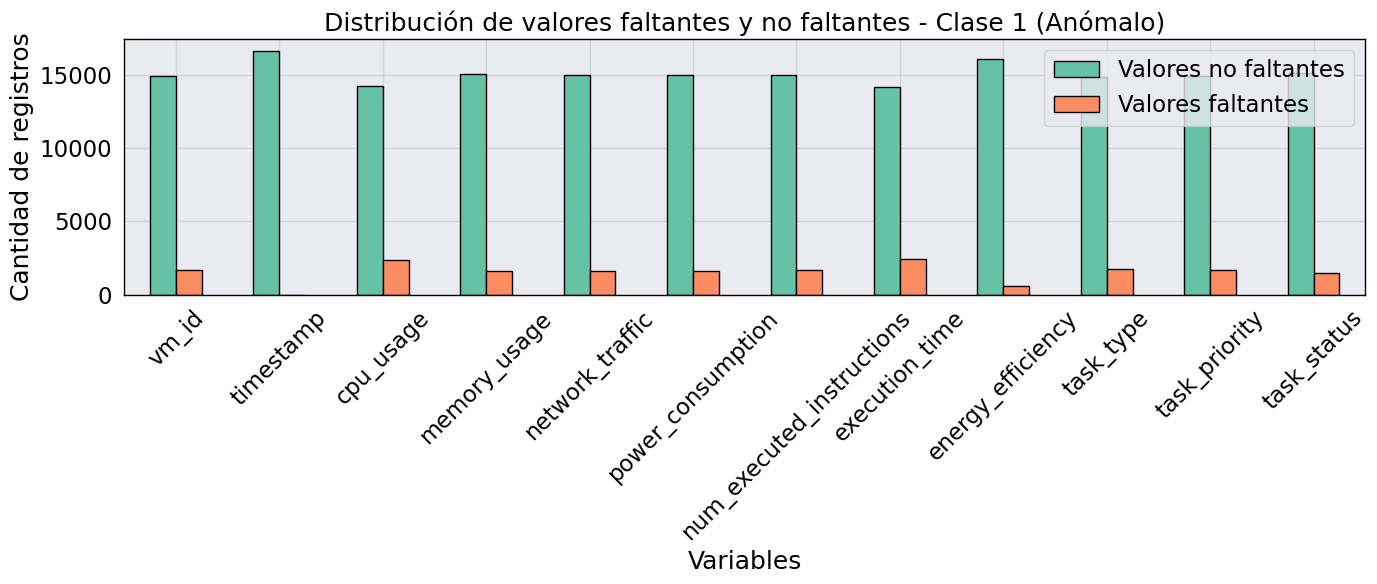

In [29]:
# Para cada clase se contabiliza los valores faltantes
missing_stats = df.groupby('Anomaly status').apply(
    lambda x: pd.DataFrame({
        'Valores no faltantes': x.notna().sum(),
        'Valores faltantes': x.isna().sum(),
        'Total registros': len(x)
    }),
    include_groups=False
)

print("Resumen de valores faltantes y no faltantes por clase de 'Anomaly status':\n")

for status in df['Anomaly status'].unique():
    print(f"\nClase {status} ({'Normal' if status == 0 else 'Anómalo'}):")
    subset = missing_stats.loc[status]
    try:
        print(subset.to_markdown(tablefmt="github"))
    except:
        print(subset.to_string(index=True))
    subset[['Valores no faltantes', 'Valores faltantes']].plot(
        kind='bar', figsize=(14,6),
        title=f"Distribución de valores faltantes y no faltantes - Clase {status} ({'Normal' if status == 0 else 'Anómalo'})"
    )
    # Se grafica el resultado por clase
    plt.xlabel("Variables")
    plt.ylabel("Cantidad de registros")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Podemos obeservar una similitud en el comportamiento de los valores faltantes entre las clases normal y anómala, y esto refuerza la idea de que los procesos de monitoreo fueron consistentes en ambas condiciones operativas como se evidenció en los histogramas y las medidas del resumen estadístico. Esta inspección nos permitirá abordar el tratamiento de los valores ausentes, aplicando estrategias de imputación o limpieza que mantengan la representatividad de los datos.


Resumen global de valores faltantes por variable:

                           Valores faltantes  Valores no faltantes  Total registros  Porcentaje faltantes (%)
task_type                              27990                249580           277570                     10.08
vm_id                                  27975                249595           277570                     10.08
energy_efficiency                      27954                249616           277570                     10.07
task_status                            27949                249621           277570                     10.07
num_executed_instructions              27933                249637           277570                     10.06
task_priority                          27896                249674           277570                     10.05
network_traffic                        27845                249725           277570                     10.03
memory_usage                           27795                249775  

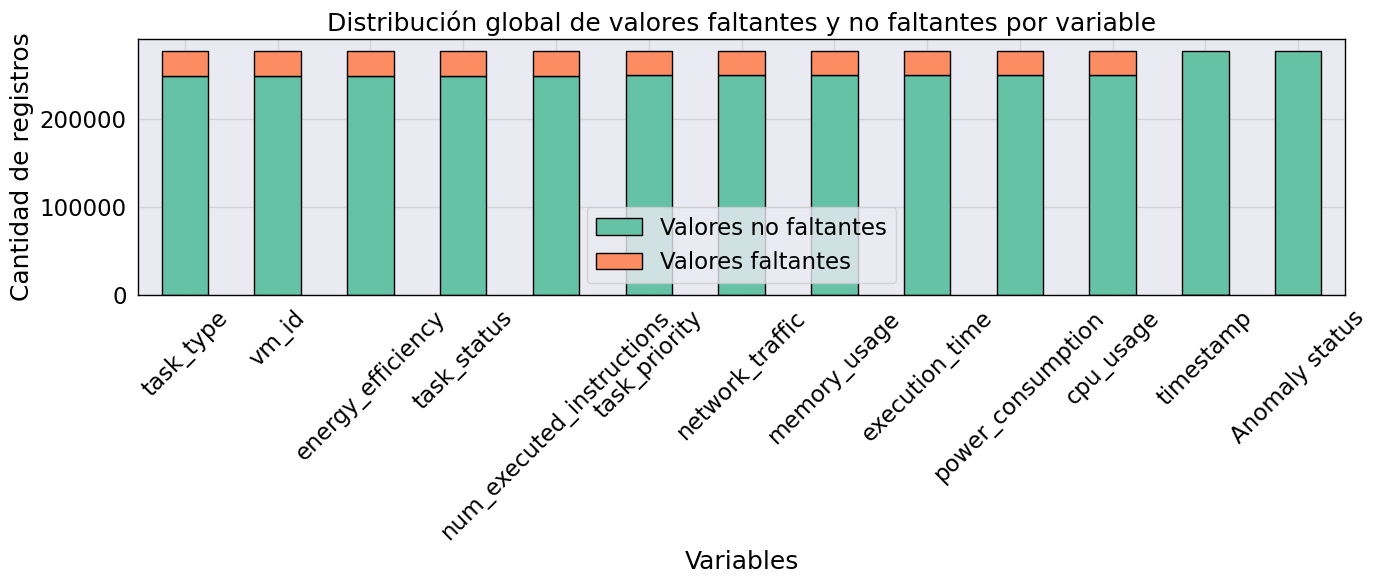

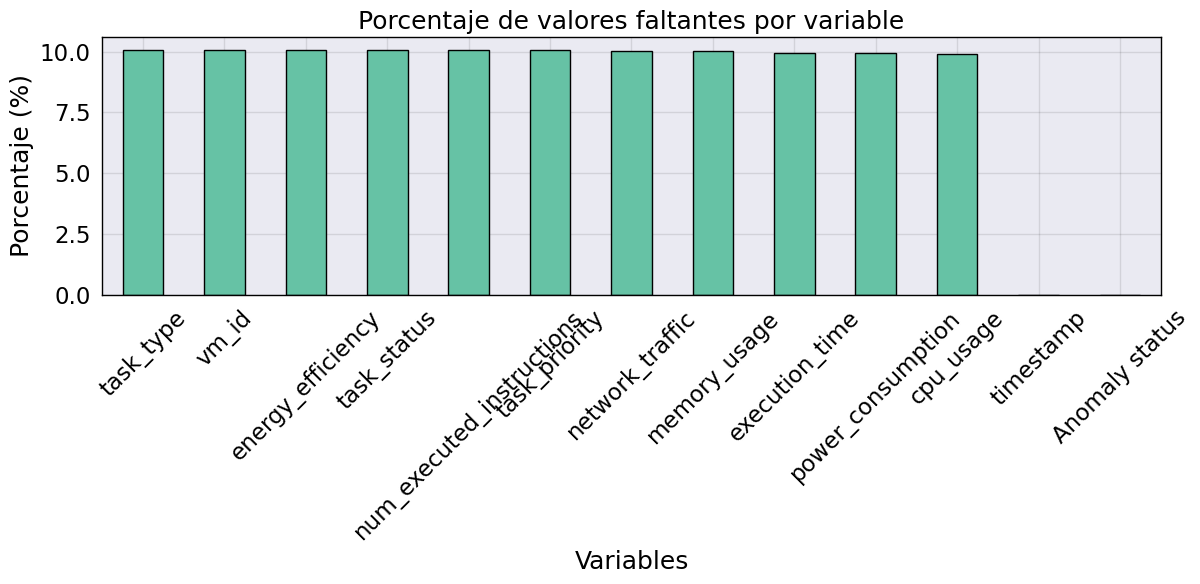

In [31]:
# Para los valores faltantes totales
missing_total = df.isnull().sum()
non_missing_total = df.notnull().sum()
total_values = len(df)

missing_percent = (missing_total / total_values) * 100

missing_df = pd.DataFrame({
    'Valores faltantes': missing_total,
    'Valores no faltantes': non_missing_total,
    'Total registros': total_values,
    'Porcentaje faltantes (%)': missing_percent
}).sort_values(by='Valores faltantes', ascending=False)

print("\nResumen global de valores faltantes por variable:\n")
try:
    print(missing_df.to_markdown(tablefmt="github", floatfmt=".2f"))
except:
    print(missing_df.to_string(float_format="%.2f"))

missing_df[['Valores no faltantes', 'Valores faltantes']].plot(
    kind='bar', stacked=True, figsize=(14,6),
)
plt.title("Distribución global de valores faltantes y no faltantes por variable")
plt.xlabel("Variables")
plt.ylabel("Cantidad de registros")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
missing_df['Porcentaje faltantes (%)'].plot(kind='bar')
plt.title("Porcentaje de valores faltantes por variable")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En general, el análisis de valores faltantes nos deja ver que el conjunto de datos mantiene una estructura relativamente consistente, con una proporción de ausencias cercana al 10% en la mayoría de las variables predictoras. Esta distribución uniforme sugiere que la falta de datos responde a causas sistemáticas o técnicas como fallas en la captura de métricas o registros incompletos más que a un sesgo asociado a la presencia de anomalías. Además, la inexistencia de valores faltantes en `timestamp` y `Anomaly status` garantiza la integridad temporal del conjunto y la fiabilidad de la variable objetivo, lo que permite avanzar en el análisis sin riesgo de pérdida de información crítica.

**2.9. Analisis de Correlación con Dataset en Crudo**

Ahora, es importante también analizar las correlaciones de las variables. Sin embargo, hay que tener presente que como lo hemos venido observando en esta inspección, el dataset tiene algunos datos faltantes, y variables categóricas que deberán ser convertidas a numéricas, por lo que, a este punto, no podemos analizarlas en esta observación de la correlación. Por lo que será necesario repetir este análisis en la selección de caracteristicas una vez los datos estén limpios y las variables categóricas correctamente codificadas y tener un mejor espectro para hacer observaciones más claras.

Correlaciones con 'Anomaly status':
Anomaly status               1.000000
network_traffic              0.040148
cpu_usage                    0.001908
num_executed_instructions    0.001474
power_consumption            0.000087
execution_time              -0.001197
memory_usage                -0.003578
energy_efficiency           -0.217539
Name: Anomaly status, dtype: float64


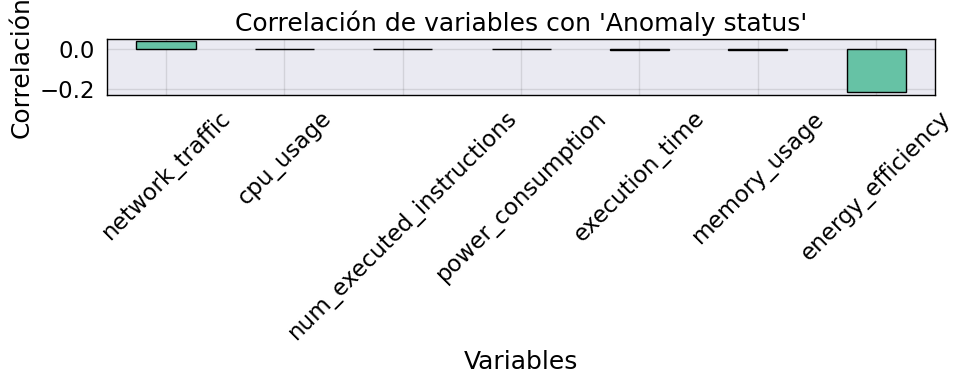

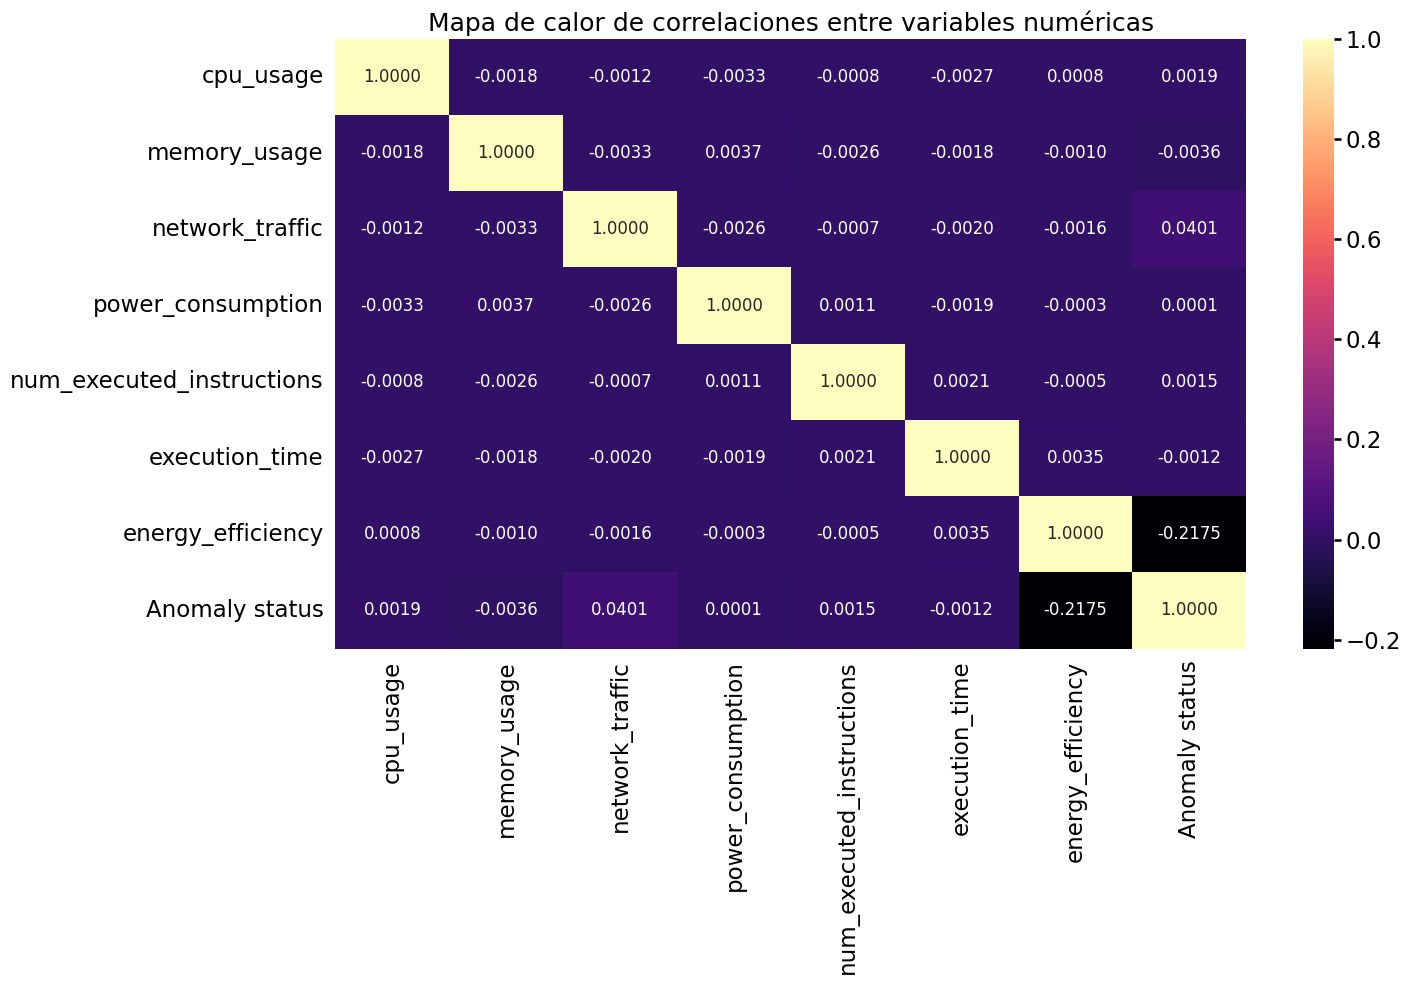

In [202]:
numerical_predictors = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr_matrix = df[numerical_predictors].corr()
print("Correlaciones con 'Anomaly status':")
corr_with_target = corr_matrix['Anomaly status'].sort_values(ascending=False)
print(corr_with_target)

# Correlación con la variable objetivo
plt.figure(figsize=(10,4))
corr_with_target.drop('Anomaly status').plot(kind='bar')
plt.title("Correlación de variables con 'Anomaly status'")
plt.ylabel("Correlación")
plt.xlabel("Variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mapa de calor
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, fmt=".4f", linewidths=0, cmap='magma')
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.tight_layout()
plt.show()

En este análisis de correlación podemos observar que `Anomaly status` mantiene relaciones muy débiles con la mayoría de las variables del sistema como `cpu_usage`, `num_executed_instructions`, `power_consumption`, `execution_time` y `memory_usage`, lo que puede indicar que ninguna de ellas tiene un vínculo lineal significativo con la presencia de anomalías. La única excepción relevante es `energy_efficiency`, que presenta una correlación negativa moderada (–0.217), sugiriendo que a medida que disminuye la eficiencia energética es más probable la aparición de anomalías, o viceversa, y quizá `network_traffic`. Estos resultados indican que las anomalías no parecen depender linealmente de los indicadores operativos tradicionales, salvo por la eficiencia energética.

Sin embargo, es importante considerar que esta aparente falta de relación puede estar influenciada por el fuerte desbalance del dataset (94% vs. 6%), que provoca que `Anomaly status` se comporte casi como una constante y dificulte que las correlaciones lineales reflejen patrones reales. A esto se suma que aún no se han incorporado las variables categóricas en su versión numérica, lo cual limita la información disponible para distinguir entre clases. Por ello, los valores de correlación cercanos a cero podrían no representar una verdadera ausencia de relación, sino más bien las restricciones impuestas por la distribución de las clases y la falta de codificación completa de las variables.

Analizamos visualmente la dispersión de las variables más correlacionadas.

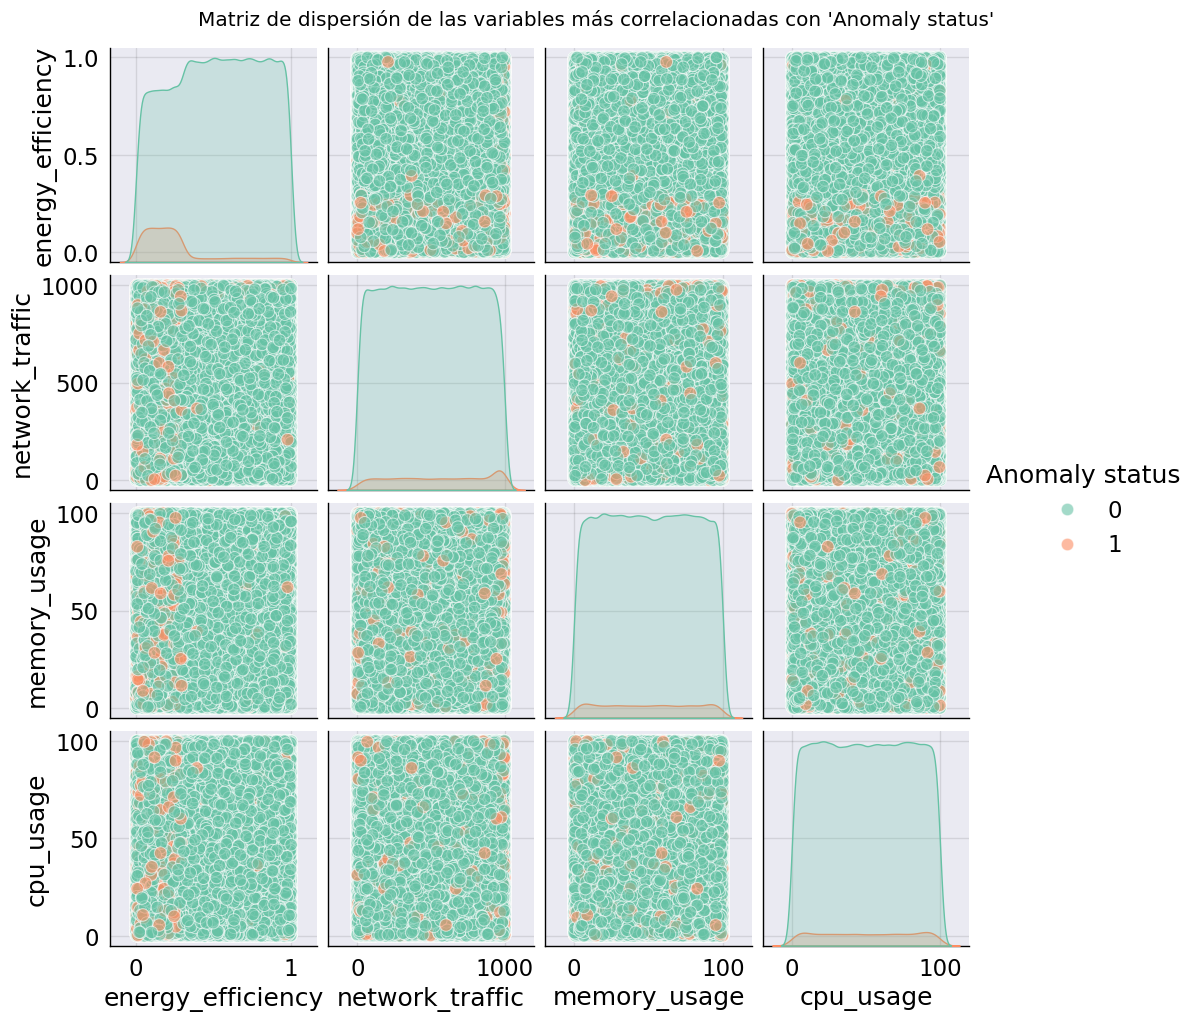

In [51]:
# Matriz de dispersión entre variables más correlacionadas
top_corr = corr_with_target.abs().sort_values(ascending=False)[1:5].index  # 4 variables más correlacionadas con la clase
sns.pairplot(df, vars=top_corr, hue='Anomaly status', palette='Set2', plot_kws={'alpha':0.6})
plt.suptitle("Matriz de dispersión de las variables más correlacionadas con 'Anomaly status'", y=1.02)
plt.show()

En esta matriz de correlación, construida a partir del dataset desbalanceado, se observa que los datos normales y anómalos aparecen completamente mezclados, sin una separación lineal ni agrupaciones claramente evidentes, lo cual nos puede indicar que ninguna variable por sí sola ya sea `cpu_usage`, `memory_usage`, `network_traffic` o `energy_efficiency` permite distinguir anomalías, pues estas se distribuyen a lo largo de todo el rango de valores. La ausencia de clusters, saltos o concentraciones diferenciadas sugiere que el sistema presenta un comportamiento continuo y estable donde las anomalías no son extremas, sino contextuales y sutiles, típicas de escenarios reales como rendimiento de máquinas virtuales, fallas de infraestructura o cargas irregulares.

Para intentar visualizar mejor un posible patrón, arbitrariamente ajustamos un dataset con 60 ejemplos de cada clase.

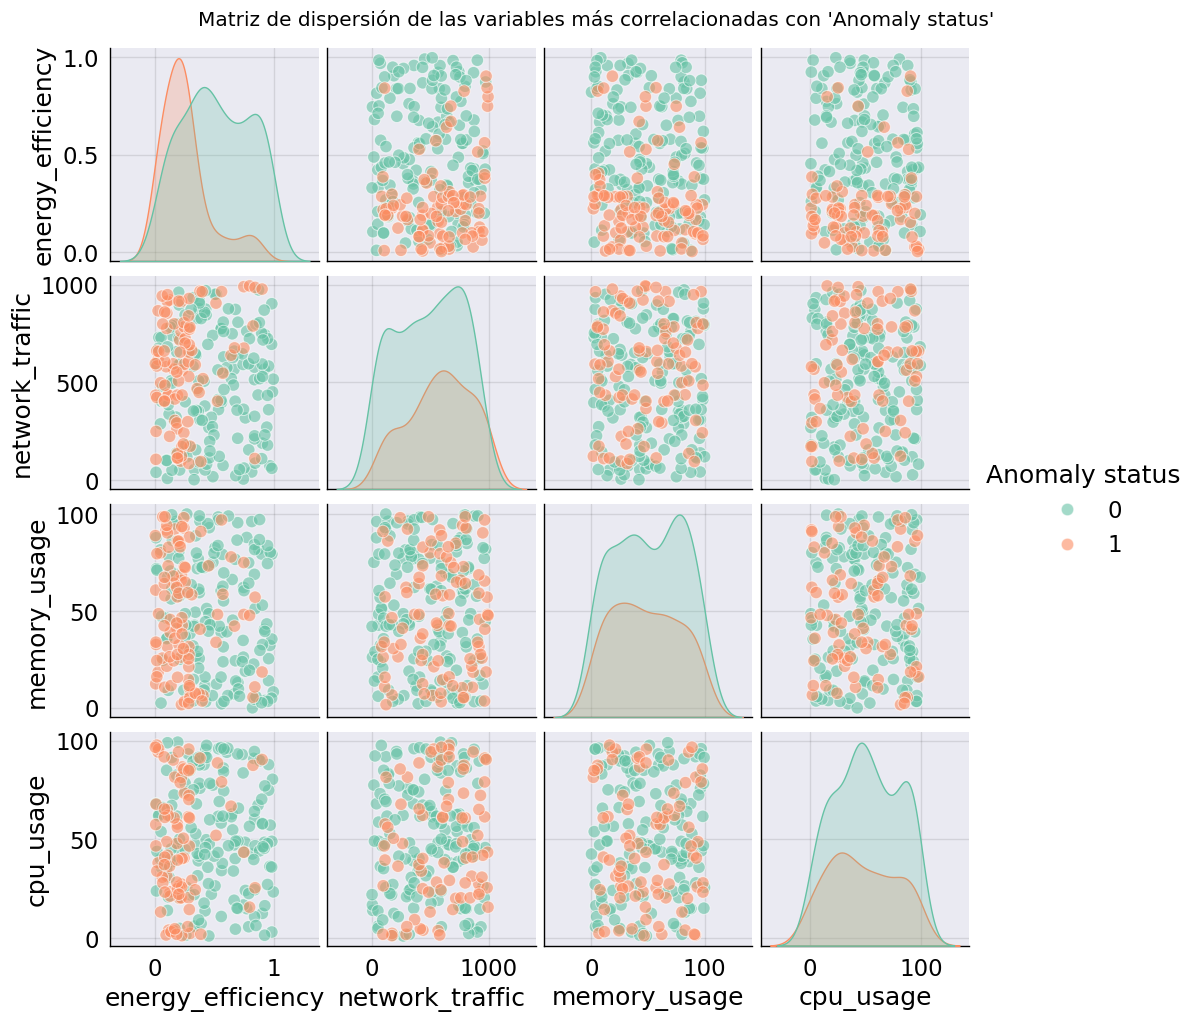

In [ ]:
numerical_predictors = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr_matrix = df[numerical_predictors].corr()
corr_with_target = corr_matrix['Anomaly status'].sort_values(ascending=False)

df_0 = df[df['Anomaly status'] == 0]
df_1 = df[df['Anomaly status'] == 1]

# Seleccionar 60 registros de cada clase
df_0_sample = df_0.sample(n=60, random_state=42)
df_1_sample = df_1.sample(n=60, random_state=42)

# Dataset ajustado para mejor visualización
df_balanced = pd.concat([df_0_sample, df_1_sample], axis=0).reset_index(drop=True)
top_corr = corr_with_target.abs().sort_values(ascending=False)[1:5].index  # 4 variables más correlacionadas con la clase
sns.pairplot(df_balanced, vars=top_corr, hue='Anomaly status', palette='Set2', plot_kws={'alpha':0.6})
plt.suptitle("Matriz de dispersión de las variables más correlacionadas con 'Anomaly status'", y=1.02)
plt.show()

La reducción del dataset permitió visualizar patrones que antes estaban ocultos por la alta densidad de datos, revelando que `energy_efficiency` es la variable con mayor capacidad discriminativa, pues las muestras anómalas tienden a concentrarse en valores bajos mientras que las normales ocupan principalmente rangos medios. `network_traffic` también muestra diferencias leves, con normales ligeramente más altas y anómalos más agrupados hacia valores medios o bajos, y en contraste, `cpu_usage` y `memory_usage` mantienen un solapamiento casi total entre clases, confirmando su bajo poder predictivo individual. 

A pesar de estas mejoras visuales, las combinaciones 2D siguen sin exhibir separación lineal ni clusters definidos, indicando que la detección de anomalías depende de relaciones no lineales y patrones combinados.

## II. Diseño de experimentos y recolección de resultados

### 3. Preparación de los Datos

Para preparar los datos analisados en la sección anterior, y basándonos en la inspección y exploración de los mismos, en donde expusimos algunos incovenientes, particularidades y posible acciones a tomar, disponemos el siguiente flujo de trabajo para tener un dataset en condiciones de entrenar y probar los diferentes modelos de machine learning supervisado:

1. Identificar y eliminar columnas irrelevantes
2. Eliminar filas con muchos valores faltantes
3. Rellenar valores faltantes
4. Codificar las variables categóricas
5. Escalar las variables numéricas
6. Balancear el conjunto de datos
7. Seleccionar caracteristicas


In [89]:
# Copiar el dataframe a el preparado
prepared_df = df.copy()

**3.1. Identificar y manejar columnas irrelevantes**

La columna `vm_id` corresponde a un identificador único asignado a cada máquina virtual. Este tipo de variables suele ser creado únicamente con fines administrativos y no para describir características de comportamiento o rendimiento del sistema. Debido a su naturaleza, es necesario evaluar si contiene información útil para un modelo de aprendizaje supervisado o si debe ser eliminada del dataset para evitar ruido y sobreajuste.

Valores únicos en vm_id: 249595
Total de filas: 277570
count    249595.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: count, dtype: float64


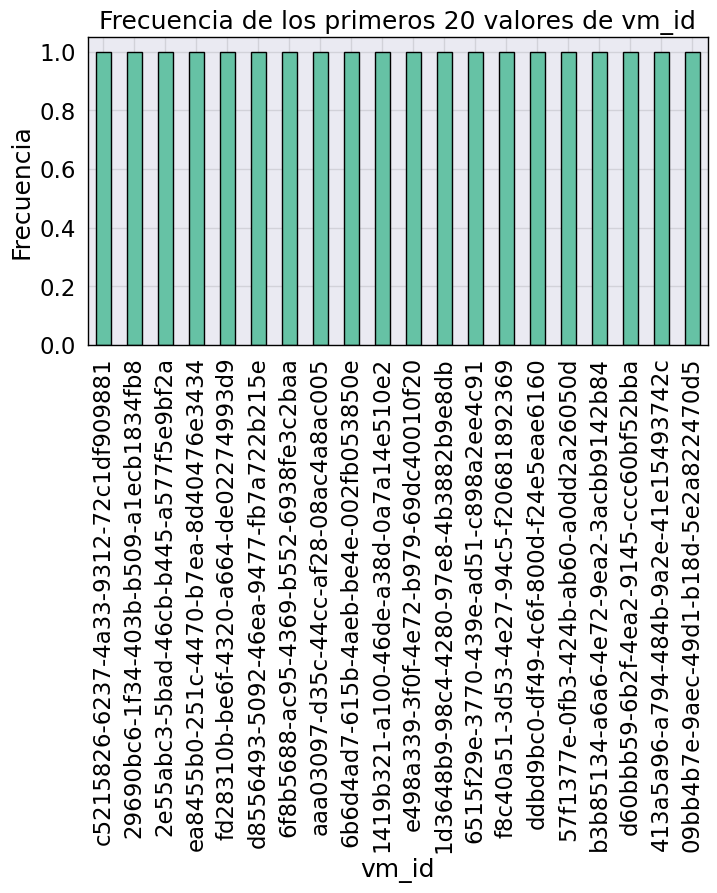

In [90]:
# Análisis de unicidad de vm_id
unique_ids = df["vm_id"].nunique()
total_rows = len(df)

print("Valores únicos en vm_id:", unique_ids)
print("Total de filas:", total_rows)

# Distribución de frecuencias
id_counts = df["vm_id"].value_counts()
print(id_counts.describe())

plt.figure(figsize=(8,4))
id_counts.head(20).plot(kind="bar")
plt.title("Frecuencia de los primeros 20 valores de vm_id")
plt.xlabel("vm_id")
plt.ylabel("Frecuencia")
plt.show()


Aquí podemos observar que la variable `vm_id` presenta un valor único para cada registro, sin tener en cuenta los valores faltantes que tiene esta columna vistos en la inspección inicial, en el histograma de frecuencias se evidencia que no hay repeticiones ni patrones que puedan asociarse con la variable a predecir `Anomaly status`. Esto indica que no aporta información predictiva, no aporta variabilidad útil, no presenta correlación con variables numéricas o categóricas y puede introducir ruido y sobreajuste en modelos sensibles a alta dimensionalidad, por lo que se justifica su eliminación del dataset.

In [91]:
# Eliminar la columna vm_id
prepared_df.drop(['vm_id'], axis=1, inplace=True)

La variable `timestamp` representa la fecha y hora en la que cada registro fue capturado. En algunos contextos, las características temporales pueden tener relación directa con la aparición de anomalías. Por esto, antes de eliminarla, es necesario evaluar si existe algún patrón temporal que influya significativamente en la variable objetivo.

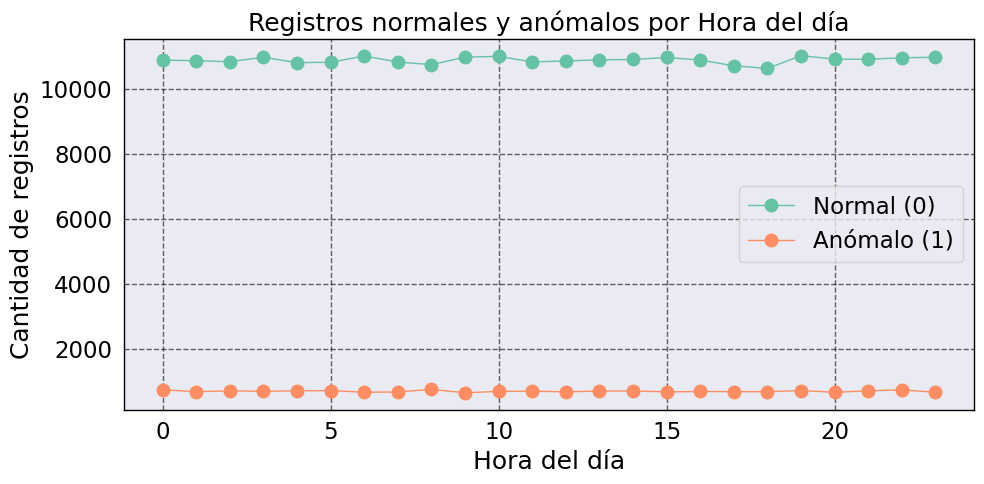

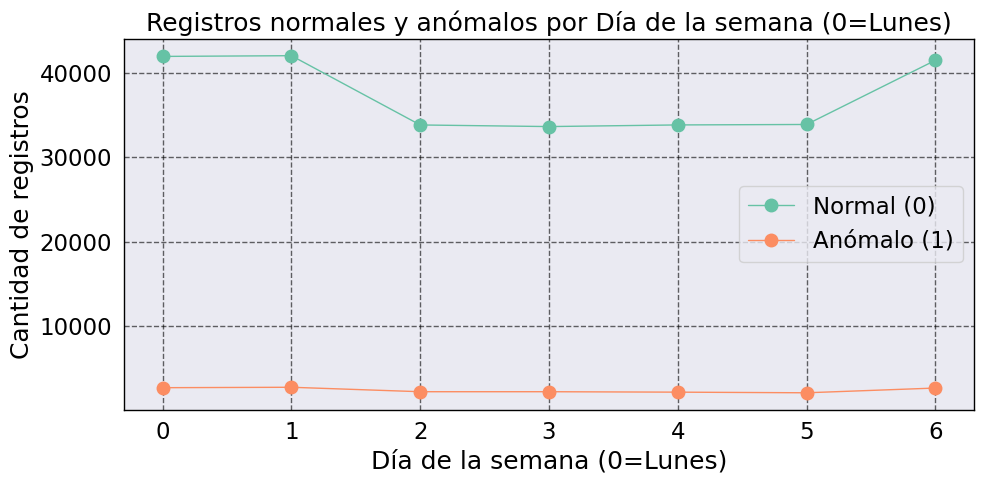

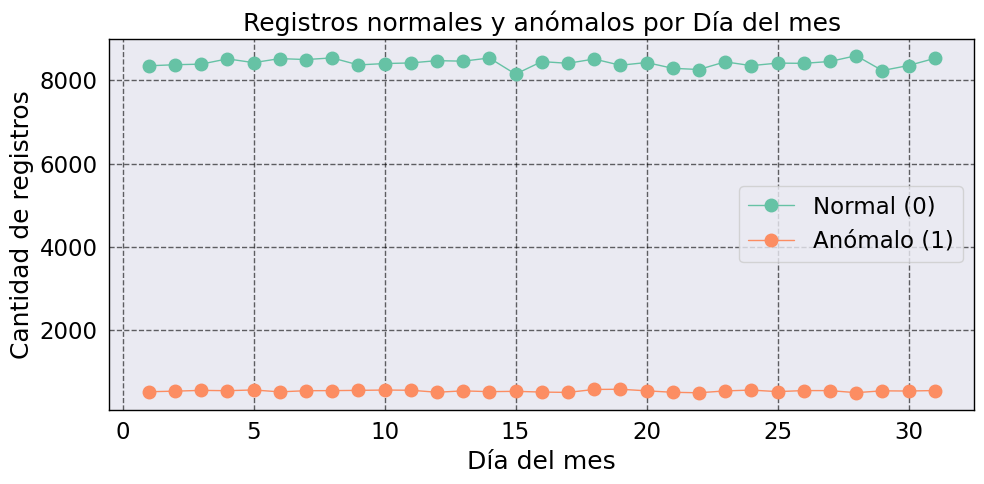

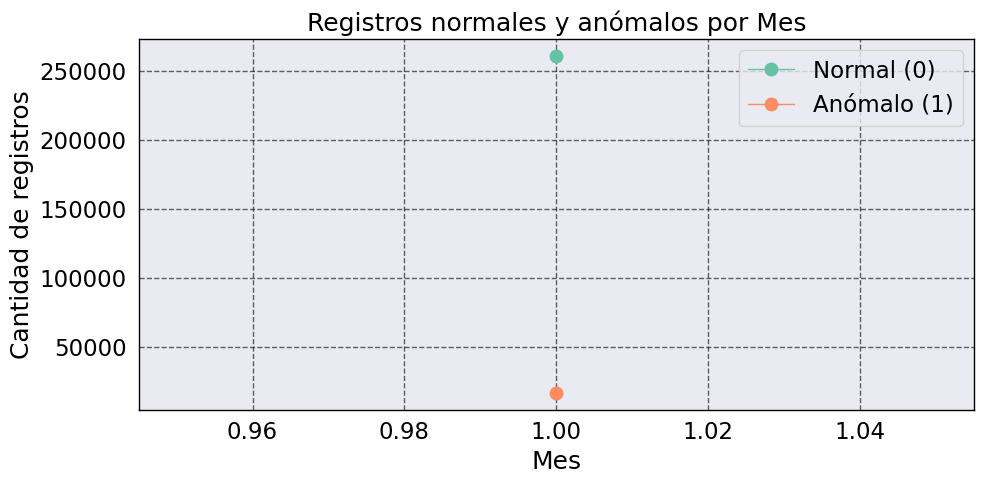

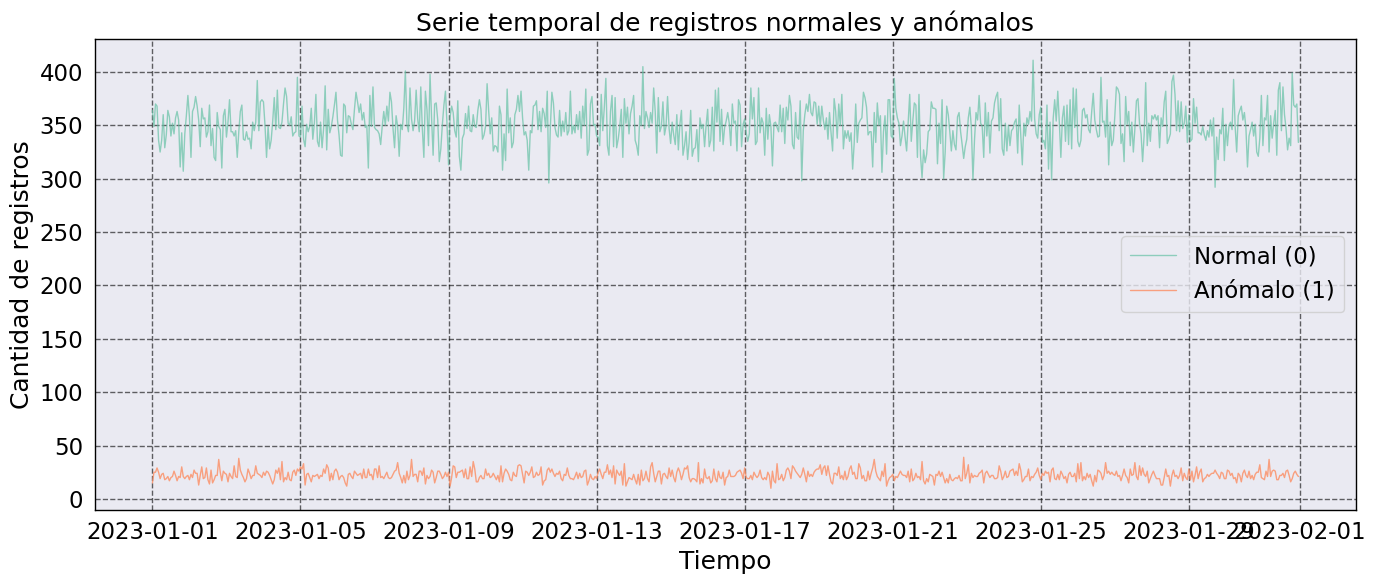

In [92]:
# Convertir timestamp a datetime
prepared_df['timestamp'] = pd.to_datetime(prepared_df['timestamp'], format='%d-%m-%Y %H:%M')

# Crear variables de tiempo
prepared_df['hour'] = prepared_df['timestamp'].dt.hour
prepared_df['dayofweek'] = prepared_df['timestamp'].dt.dayofweek   # 0 = lunes, 6 = domingo
prepared_df['day'] = prepared_df['timestamp'].dt.day
prepared_df['month'] = prepared_df['timestamp'].dt.month

def plot_by_anomaly(prepared_df, time_col, title):
    plt.figure(figsize=(10,5))

    # Agrupar por valor temporal
    grouped = prepared_df.groupby(time_col)['Anomaly status']

    # Serie normales
    normal = grouped.apply(lambda x: (x == 0).sum())

    # Serie anómalas
    anomalous = grouped.apply(lambda x: (x == 1).sum())

    # Plot
    plt.plot(normal.index, normal.values, marker='o', linestyle='-', label='Normal (0)')
    plt.plot(anomalous.index, anomalous.values, marker='o', linestyle='-', label='Anómalo (1)')

    plt.title(f'Registros normales y anómalos por {title}')
    plt.xlabel(title)
    plt.ylabel('Cantidad de registros')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_by_anomaly(prepared_df, 'hour', 'Hora del día')
plot_by_anomaly(prepared_df, 'dayofweek', 'Día de la semana (0=Lunes)')
plot_by_anomaly(prepared_df, 'day', 'Día del mes')
plot_by_anomaly(prepared_df, 'month', 'Mes')

# Agrupar por hora
prepared_df_time = prepared_df.set_index('timestamp')

# Contar registros normales (0) y anómalos (1) por hora
normal_series = prepared_df_time[prepared_df_time['Anomaly status'] == 0].resample('h').size()
anomaly_series = prepared_df_time[prepared_df_time['Anomaly status'] == 1].resample('h').size()

plt.figure(figsize=(14,6))
plt.plot(normal_series.index, normal_series.values, label='Normal (0)', alpha=0.7)
plt.plot(anomaly_series.index, anomaly_series.values, label='Anómalo (1)', alpha=0.8)

plt.title('Serie temporal de registros normales y anómalos')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de registros')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Tras convertir y analizar la variable temporal, no identificamos patrones relevantes entre la fecha u hora y la aparición de anomalías. Las distribuciones de hora, día y mes son similares para ambas clases y los gráficos no muestran tendencias claras. Esto indica que la temporalidad no explica la variabilidad de la clase, que la variable no aporta información relevante para la clasificación y mantenerla añadiría ruido y dimensionalidad innecesaria al modelo, así que se justifica la eliminación de la variable `timestamp`.

In [93]:
# Eliminar las columnas de temporalidad
prepared_df.drop(['timestamp', 'hour', 'dayofweek', 'day', 'month'], axis=1, inplace=True)

**3.2. Eliminar filas con muchos valores faltantes**

Durante la inspección del conjunto de datos observamos la distribución general de valores faltantes tanto a nivel global como por clase, el resumen general nos mostró que prácticamente todas las variables excepto `timestamp` y `Anomaly status` presentan alrededor de un 10% de valores faltantes, esto nos sugiere que la presencia de datos incompletos no es un fenómeno aislado ni atribuible a una única métrica, sino una característica transversal del conjunto de datos. Además, al desagregar la información por clases, notamos un patrón importante, que la clase 1 (Anómalo) contiene solo 16.654 registros, mientras que la clase 0 (Normal) acumula 260.916 registros, lo cual confirma un desbalance sustancial. También observamos que, aunque ambas clases exhiben proporciones relativamente similares de valores faltantes por variable, el volumen absoluto de datos faltantes es mucho mayor en la clase 0 debido a su tamaño.

Consideramos que, al estar frente a un problema altamente desbalanceado, no podemos darnos el lujo de eliminar de manera agresiva registros pertenecientes a la clase 1. Reducir aún más la cantidad de ejemplos anómalos afectaría la capacidad del modelo para aprender patrones minoritarios y podría deteriorar su desempeño en tareas de detección.

Por ello, adoptamos una estrategia de limpieza asimétrica:

- Aplicar un umbral de eliminación solo a la clase 0, eliminando filas que excedan un cierto número de valores faltantes.
- Conservar íntegramente la clase 1, preservando su distribución original y favoreciendo la fidelidad del aprendizaje y solo imputando esos datos faltantes, y en cierta medida reduciendo un poco el desbalance (aunque no suficiente).

El siguiente código permite cuantificar el impacto de esta decisión en la clase 0 utilizando un umbral de eliminación establecido en más de 2 variables faltantes por registro.

In [94]:
UMBRAL_ELIMINACION = 2

# Identificamos filas de clase 0
clase_0 = prepared_df['Anomaly status'] == 0

# Condición de más de UMBRAL_ELIMINACION valores faltantes
condicional = prepared_df.isna().sum(axis=1) > UMBRAL_ELIMINACION

# Conteo para reporte
total_clase_0 = clase_0.sum()
conteo_condicional = (clase_0 & condicional).sum()

if total_clase_0 > 0:
    porcentaje = (conteo_condicional / total_clase_0) * 100
    print(f"Total de registros en la Clase 0: {total_clase_0}")
    print(f"Registros de Clase 0 con más de {UMBRAL_ELIMINACION} NaNs (a eliminar): {conteo_condicional}")
    print(f"Porcentaje de registros de Clase 0 a eliminar: {porcentaje:.2f}%")
else:
    print("No hay registros en la Clase 0 para calcular el porcentaje.")

# Eliminación de filas en Clase 0 que superen el umbral
prepared_df = prepared_df.drop(prepared_df[clase_0 & condicional].index).reset_index(drop=True)

print("Dimensiones finales del dataframe:", prepared_df.shape)


Total de registros en la Clase 0: 260916
Registros de Clase 0 con más de 2 NaNs (a eliminar): 18502
Porcentaje de registros de Clase 0 a eliminar: 7.09%
Dimensiones finales del dataframe: (259068, 11)


**3.3. Rellenar valores faltantes**

Observamos en la sección de inspección que las variables numéricas presentan distribuciones aproximadamente uniformes a lo largo de sus rangos, lo que sugiere ausencia de sesgos o picos pronunciados. Adoptamos para la mayoría de estas métricas una imputación por media, ya que en una distribución uniforme la media es un estimador no sesgado y evita introducir desplazamientos sistemáticos en los datos. A continuación se aplica SimpleImputer(strategy='mean') a las variables numéricas generales.

In [95]:
vars_num_general = [
    "cpu_usage", "memory_usage", "network_traffic",
    "power_consumption", "energy_efficiency"
]

imputer_mean = SimpleImputer(strategy="mean")
prepared_df[vars_num_general] = imputer_mean.fit_transform(prepared_df[vars_num_general])

Aunque la distribución es uniforme, algunas variables numéricas pueden no tener un rango definido, por ejemplo `num_executed_instructions` y `execution_time` que conviene preservar con una imputación basada en vecinos similares en el espacio de atributos. Adoptamos KNNImputer para estas variables predictoras, usando como entrada las principales variables numéricas ya imputadas para que la estimación se base en el contexto completo del sistema.

In [96]:
vars_contexto = [
    "cpu_usage", "memory_usage", "network_traffic",
    "power_consumption", "energy_efficiency",
    "num_executed_instructions", "execution_time"
]

imputer_knn = KNNImputer(n_neighbors=5, weights="uniform")
prepared_df[vars_contexto] = imputer_knn.fit_transform(prepared_df[vars_contexto])

Las variables categóricas como `task_type` y `task_status` no muestran una dominancia extrema de categorías y que el dataset parece generado con cobertura amplia de estados. Adoptamos una imputación por moda como primera pasada `most_frequent` porque proporciona valores válidos y reproducibles.

In [97]:
vars = ["task_type", "task_status"]
imputer_mode = SimpleImputer(strategy="most_frequent")
prepared_df[vars] = imputer_mode.fit_transform(prepared_df[vars])

`task_priority` es una variable ordinal con un orden intrínseco (por ejemplo: low < medium < high). Adoptamos una imputación con KNNImputer sobre una codificación ordinal para respetar la jerarquía. El procedimiento consiste en codificar ordinalmente la variable, aplicar KNNImputer usando como referencia las variables numéricas ya imputadas, redondear las predicciones a niveles válidos y decodificar de nuevo a las etiquetas originales.

In [98]:
encoder_priority = OrdinalEncoder()
non_null_priority = prepared_df[prepared_df["task_priority"].notna()]["task_priority"].values.reshape(-1, 1)
encoder_priority.fit(non_null_priority)

mapping = {cat: idx for idx, cat in enumerate(encoder_priority.categories_[0])}
inv_mapping = {v: k for k, v in mapping.items()}

prepared_df["task_priority_ord"] = prepared_df["task_priority"].map(mapping)

imputer_knn_ord = KNNImputer(n_neighbors=5)
cols_for_knn_ord = [
    "cpu_usage", "memory_usage", "network_traffic",
    "power_consumption", "energy_efficiency", "task_priority_ord"
]
knn_result = imputer_knn_ord.fit_transform(prepared_df[cols_for_knn_ord])

task_priority_imputed = np.rint(knn_result[:, -1]).astype(int)

min_cat = 0
max_cat = len(encoder_priority.categories_[0]) - 1
task_priority_imputed = np.clip(task_priority_imputed, min_cat, max_cat)

prepared_df["task_priority"] = [inv_mapping[val] for val in task_priority_imputed]

prepared_df.drop(columns=["task_priority_ord"], inplace=True)

Verificamos que no queden valores faltantes:

In [101]:
print("NaNs por columna después de imputación:")
print(prepared_df.isna().sum())

NaNs por columna después de imputación:
cpu_usage                    0
memory_usage                 0
network_traffic              0
power_consumption            0
num_executed_instructions    0
execution_time               0
energy_efficiency            0
task_type                    0
task_priority                0
task_status                  0
Anomaly status               0
dtype: int64


**3.4. Codificar las variables categóricas**

En esta etapa del preprocesamiento se realiza la transformación de las variables categóricas para que puedan ser interpretadas por los modelos de aprendizaje supervisado. Como ya se eliminaron las columnas `vm_id` y `timestamp` debido a que no aportaban valor predictivo, nos enfocamos únicamente en las variables categóricas restantes, las cuales son `task_type`, `task_priority` y `task_status`. Cada una posee características distintas y por ello es importante aplicar un tipo de codificación adecuado de acuerdo con su naturaleza. 

Antes de transformar las variables es necesario identificar si su información representa categorías nominales o bien categorías con un orden implícito. Las variables nominales no siguen ninguna jerarquía, por lo que cada categoría es simplemente distinta sin ser mayor o menor que otra. En cambio, las categorías ordinales sí representan un nivel o jerarquía y por lo tanto necesitan un tipo de codificación que respete esta relación.

In [ ]:
categorical_cols = ['task_type', 'task_priority', 'task_status']
prepared_df[categorical_cols].head(10)

task_type task_priority task_status
0   network        medium     waiting
1        io          high   completed
2        io        medium   completed
3   compute        medium   completed
4        io           low     waiting
5   compute        medium   completed
6        io           low     running
7        io          high     running
8        io           low   completed
9   network           low     waiting

In [108]:
# Vemos los valores únicos por columna categórica
for col in categorical_cols:
    unique_vals = prepared_df[col].unique()
    print(f"Columna '{col}': {len(unique_vals)} valores únicos -> {unique_vals}")

Columna 'task_type': 3 valores únicos -> ['network' 'io' 'compute']
Columna 'task_priority': 3 valores únicos -> ['medium' 'high' 'low']
Columna 'task_status': 3 valores únicos -> ['waiting' 'completed' 'running']


La variable `task_status` puede parecer, a primera vista, relacionada con una secuencia de etapas del proceso de ejecución de tareas. Sin embargo, su estructura y comportamiento dentro del dataset demuestran que no existe un orden natural universal ni una relación jerárquica entre sus valores, lo que impide considerarla como una variable ordinal. En entornos de computación en la nube, los estados `waiting`, `running`, `completed` no siguen una secuencia fija aplicable a todas las tareas, pueden repetirse, omitirse o alternarse según el tipo de proceso, el scheduler o la dinámica del sistema. Por ello, imponer un orden numérico sería artificial y generaría relaciones inexistentes que distorsionarían el aprendizaje del modelo.

Si asignamos una codificación ordinal, por ejemplo:

| Categoría | Orden |
| :--- | :--- |
| waiting | 0 |
| running | 1 |
| completed | 2 |

El modelo podría asumir que `completed` está dos unidades por encima de `waiting`, o que `running` está a la mitad de `completed`, lo cual carece completamente de sentido operativo. Estas relaciones numéricas no existen en el dominio real y afectarían negativamente el rendimiento del modelo, dado que estaría aprendiendo una estructura inexistente, ya que, ninguno de los estados indica un nivel mayor o menor de manera cuantitativa o semántica.

Entonces:

* No hay progresión establecida válida para todos los registros
* No existe jerarquía semántica entre los estados
* Son etiquetas descriptivas, no niveles

Así que, usaremos el método de codificación nominal para esta varible categórica con OneHotEconder de la librería scikit-learn.

In [111]:
# Codificación de task_status
ohe_status = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

task_status_encoded = ohe_status.fit_transform(prepared_df[['task_status']])

task_status_df = pd.DataFrame(
    task_status_encoded,
    columns=ohe_status.get_feature_names_out(['task_status']),
    index=prepared_df.index
)

# Concatenación al dataframe
prepared_df = pd.concat([prepared_df.drop(columns=['task_status']), task_status_df], axis=1)

Al igual que la anterior, la variable `task_type` es categórica nominal porque describe el tipo de operación que ejecuta una tarea `network`, `io`, `compute` sin ninguna jerarquía implícita. Ninguno de estos tipos es cualitativa o cuantitativamente superior; simplemente representan categorías diferentes que no pueden ordenarse.

* Representa clases sin secuencia
* No existe proximidad semántica entre categorías
* No se puede imponer una escala numérica válida

Esto implica que no existe un concepto de "más alto" o "más bajo" como en `task_status`, por lo que su codificación correcta también es One-Hot Encoding.

In [112]:
# Codificación de task_type
ohe_type = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

task_type_encoded = ohe_type.fit_transform(prepared_df[['task_type']])

task_type_df = pd.DataFrame(
    task_type_encoded,
    columns=ohe_type.get_feature_names_out(['task_type']),
    index=prepared_df.index
)

# Concatenación al dataframe
prepared_df = pd.concat([prepared_df.drop(columns=['task_type']), task_type_df], axis=1)

Por último, `task_priority` y contrario a las anteriores, esta variable sí es una variable categórica ordinal porque sus niveles `low`, `medium` y `high` representan explícitamente una escala creciente de importancia. Esta jerarquía es parte del diseño del sistema y refleja un gradiente real utilizado en la gestión de tareas, por lo que la codificación debe respetar dicho orden natural. Codificarla numéricamente sin romper la secuencia permite que los modelos capturen adecuadamente la relación entre prioridades.

- Representa un nivel creciente de urgencia
- La jerarquía es clara y definida por el sistema 
- La codificación debe preservar la relación de orden

| Prioridad | ¿Tiene orden? | Orden | Justificación breve |
| :--- | :---: | :--- | :--- |
| low | Sí | 0 | Nivel más bajo de importancia |
| medium | Sí | 1 | Nivel intermedio claramente definido |
| high | Sí | 2 | Nivel máximo de urgencia |

Así que para esta variable usamos la codificación ordinal con OrdinalEncoder también de la librería scikit-learn.

In [ ]:
priority_order = [['low', 'medium', 'high']]

ordinal_priority = OrdinalEncoder(categories=priority_order)

prepared_df['task_priority_encoded'] = ordinal_priority.fit_transform(
    prepared_df[['task_priority']]
)

# Eliminamos la columna original
prepared_df = prepared_df.drop(columns=['task_priority']).rename(columns={'task_priority_encoded': 'task_priority'})
prepared_df.head(10)

cpu_usage  memory_usage  network_traffic  power_consumption  \
0  54.881350     78.950861       164.775973         287.808986   
1  71.518937     29.901883       500.731460         362.273569   
2  50.009478     92.709195       203.674847         231.467903   
3  79.172504      2.972252       926.374030         173.559325   
4  87.001215     46.620176       437.188115          77.054702   
5  61.693400      0.665019       686.374706         154.891172   
6  43.703195     28.118220       500.731460         448.020527   
7  67.063787     56.200805       856.372924         300.816338   
8  12.892630     49.955720       906.808046         330.207842   
9  83.794491     18.781377       347.694315         395.090687   

   num_executed_instructions  execution_time  energy_efficiency  \
0                     7527.0       69.345575           0.553589   
1                     5348.0       41.396040           0.349856   
2                     5483.0       24.602549           0.796277   
3                     8644.0       55.702673           0.779499   
4                     9427.0       65.479719           0.207164   
5                     6006.0       99.542059           0.992291   
6                     4628.0       81.336898           0.540977   
7                     3925.0        1.625046           0.979356   
8                     6940.0       14.172431           0.123155   
9                     2961.0       29.873152           0.361522   

   Anomaly status  task_status_completed  task_status_running  \
0               0                    0.0                  0.0   
1               0                    1.0                  0.0   
2               0                    1.0                  0.0   
3               0                    1.0                  0.0   
4               0                    0.0                  0.0   
5               0                    1.0                  0.0   
6               0                    0.0                  1.0   
7               0                    0.0                  1.0   
8               1                    1.0                  0.0   
9               0                    0.0                  0.0   

   task_status_waiting  task_type_compute  task_type_io  task_type_network  \
0                  1.0                0.0           0.0                1.0   
1                  0.0                0.0           1.0                0.0   
2                  0.0                0.0           1.0                0.0   
3                  0.0                1.0           0.0                0.0   
4                  1.0                0.0           1.0                0.0   
5                  0.0                1.0           0.0                0.0   
6                  0.0                0.0           1.0                0.0   
7                  0.0                0.0           1.0                0.0   
8                  0.0                0.0           1.0                0.0   
9                  1.0                0.0           0.0                1.0   

   task_priority  
0            1.0  
1            2.0  
2            1.0  
3            1.0  
4            0.0  
5            1.0  
6            0.0  
7            2.0  
8            0.0  
9            0.0

Quedando todas las variables en formato numérico.

**3.5. Escalar las variables numéricas**

En esta etapa procedemos a escalar las variables numéricas del conjunto de datos con el objetivo de normalizar sus magnitudes y mejorar la estabilidad del entrenamiento de los modelos basados en gradiente, especialmente las redes neuronales. Cómo ya mencionamos, durante la fase de inspección observamos que todas las variables numéricas presentan distribuciones aproximadamente uniformes y no contienen valores atípicos significativos, además, todas se encuentran en escalas muy distintas entre sí, por lo que, bajo estas condiciones, seleccionamos `StandardScaler` como método para escalar, ya que permite centrar las variables en una media de 0 y desviación estándar de 1 sin asumir normalidad, funciona adecuadamente con distribuciones uniformes, y al ofrecernos un desempeño más estable y una convergencia más rápida en modelos neuronales que alternativas como `MinMaxScaler`, que comprime los valores en un rango fijo [0 – 1], o `RobustScaler`, pensado para datos con fuerte presencia de outliers que aquí no se observaron. 

No se aplicará ninguna transformación logarítmica debido a la ausencia de sesgos marcados o estructuras exponenciales en las variables. Finalmente, incluiremos dentro del escalado la variable `task_priority`, ya que, tras su codificación ordinal (low = 0, medium = 1, high = 2), se comporta como una magnitud numérica y mantenerla sin escalar introduciría inconsistencia respecto al resto de las features continuas.

In [116]:
# Seleccionar variables numéricas
numeric_features = [
    "cpu_usage",
    "memory_usage",
    "network_traffic",
    "power_consumption",
    "num_executed_instructions",
    "execution_time",
    "energy_efficiency",
    "task_priority"
]

scaled_df = prepared_df.copy()
scaler = StandardScaler()

# Ajustar y transformar
scaled_df[numeric_features] = scaler.fit_transform(prepared_df[numeric_features])

prepared_df = scaled_df.copy()
prepared_df.head(10)

cpu_usage  memory_usage  network_traffic  power_consumption  \
0  1.761002e-01  1.049120e+00    -1.215186e+00           0.272718   
1  7.774874e-01 -7.256006e-01     2.056087e-16           0.810192   
2  2.568349e-16  1.546933e+00    -1.074485e+00          -0.133944   
3  1.054136e+00 -1.699985e+00     1.539594e+00          -0.551920   
4  1.337114e+00 -1.206888e-01    -2.298430e-01          -1.248476   
5  4.223306e-01 -1.783467e+00     6.714912e-01          -0.686664   
6 -2.279488e-01 -7.901382e-01     2.056087e-16           1.429101   
7  6.164502e-01  2.259636e-01     1.286393e+00           0.366603   
8 -1.341637e+00 -2.570930e-16     1.468822e+00           0.578746   
9  1.221203e+00 -1.127970e+00    -5.535515e-01           1.047061   

   num_executed_instructions  execution_time  energy_efficiency  \
0                   0.907035        0.695215           0.195591   
1                   0.124335       -0.308744          -0.542037   
2                   0.172827       -0.911974           1.074258   
3                   1.308263        0.205156           1.013512   
4                   1.589517        0.556352          -1.058662   
5                   0.360689        1.779886           1.783940   
6                  -0.134290        1.125949           0.149929   
7                  -0.386809       -1.737336           1.737108   
8                   0.696184       -1.286628          -1.362821   
9                  -0.733079       -0.722651          -0.499799   

   Anomaly status  task_status_completed  task_status_running  \
0               0                    0.0                  0.0   
1               0                    1.0                  0.0   
2               0                    1.0                  0.0   
3               0                    1.0                  0.0   
4               0                    0.0                  0.0   
5               0                    1.0                  0.0   
6               0                    0.0                  1.0   
7               0                    0.0                  1.0   
8               1                    1.0                  0.0   
9               0                    0.0                  0.0   

   task_status_waiting  task_type_compute  task_type_io  task_type_network  \
0                  1.0                0.0           0.0                1.0   
1                  0.0                0.0           1.0                0.0   
2                  0.0                0.0           1.0                0.0   
3                  0.0                1.0           0.0                0.0   
4                  1.0                0.0           1.0                0.0   
5                  0.0                1.0           0.0                0.0   
6                  0.0                0.0           1.0                0.0   
7                  0.0                0.0           1.0                0.0   
8                  0.0                0.0           1.0                0.0   
9                  1.0                0.0           0.0                1.0   

   task_priority  
0       0.076471  
1       1.286175  
2       0.076471  
3       0.076471  
4      -1.133232  
5       0.076471  
6      -1.133232  
7       1.286175  
8      -1.133232  
9      -1.133232

**3.6. Balancear el conjunto de dato**

 Durante la inspección previa confirmamos que el conjunto de datos presenta un desbalanceo severo de clases, donde únicamente el 6% de las observaciones corresponden a la clase positiva. Este desequilibrio puede causar que los modelos supervisados que necesitamos entrenar tiendan a favorecer la clase mayoritaria y obtener métricas engañosas, por esto, se hace necesario aplicar técnicas de balanceo antes de entrenar los modelos de aprendizaje supervisado. 
 
 Para evaluar el efecto de distintas estrategias de balanceo sobre el desempeño de los modelos, se realizan los siguientes experimentos utilizando Regresión Logística y Árbol de Decisión, ya que estos modelos representan enfoques complementarios: la Regresión Logística es un modelo lineal que sirve como referencia básica, mientras que los Árboles de Decisión son modelos no lineales que pueden capturar interacciones complejas entre las variables, ofreciendo una visión más completa del impacto del balanceo sobre diferentes tipos de algoritmos.
 
 Comencemos por evaluar una Regresión Logística con `LogisticRegression` de la librería de scikit-learn, con diferentes estrategias para balancear el dataset y observar cómo se comporta el modelo en cada una ella.

In [ ]:
balanced_df_base = prepared_df.copy()

X = balanced_df_base.drop("Anomaly status", axis=1)
y = balanced_df_base["Anomaly status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Modelo de regresión logística
model = LogisticRegression(max_iter=200, n_jobs=-1)

def evaluate(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_proba)
    }

results = {}

# SIN BALANCEO
model.fit(X_train, y_train)
pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]

results["No Balanceo"] = evaluate(y_test, pred, proba)

# SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

model.fit(X_sm, y_sm)
pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]

results["SMOTE"] = evaluate(y_test, pred, proba)

# SMOTE + TOMEKLINKS
smt = SMOTETomek(random_state=42)
X_smt, y_smt = smt.fit_resample(X_train, y_train)

model.fit(X_smt, y_smt)
pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]

results["SMOTE + TomekLinks"] = evaluate(y_test, pred, proba)

# SMOTE + ENN
sme = SMOTEENN(random_state=42)
X_sme, y_sme = sme.fit_resample(X_train, y_train)

model.fit(X_sme, y_sme)
pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]

results["SMOTE + ENN"] = evaluate(y_test, pred, proba)

# UNDERSAMPLING
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.2)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

model.fit(X_rus, y_rus)
pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]

results["Undersampling"] = evaluate(y_test, pred, proba)

# UNDERSAMPLING + SMOTE
rus_first = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
X_tmp, y_tmp = rus_first.fit_resample(X_train, y_train)

sm_after = SMOTE(random_state=42)
X_comb, y_comb = sm_after.fit_resample(X_tmp, y_tmp)

model.fit(X_comb, y_comb)
pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]

results["Undersampling + SMOTE"] = evaluate(y_test, pred, proba)

# RESULTADOS
results_df_balancing = pd.DataFrame(results).T
results_df_balancing = results_df_balancing.sort_values("F1", ascending=False)

results_df_balancing.round(4)


c:\Users\ESTUDIANTE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Accuracy  Precision  Recall      F1  ROC-AUC
SMOTE                    0.6850     0.1421  0.7739  0.2401   0.7663
SMOTE + TomekLinks       0.6849     0.1420  0.7739  0.2400   0.7663
Undersampling + SMOTE    0.6833     0.1414  0.7742  0.2391   0.7662
SMOTE + ENN              0.6068     0.1248  0.8505  0.2176   0.7654
Undersampling            0.9283     0.1614  0.0276  0.0472   0.7670
No Balanceo              0.9357     0.0000  0.0000  0.0000   0.7665

Continuamos por evaluar el Árbol de Decisión con las mismas estrategias para balancear el dataset anteriores, utilizando `DecisionTreeClassifier` también de la librería scikit-learn.

In [ ]:
balanced_df_base = prepared_df.copy()

X = balanced_df_base.drop("Anomaly status", axis=1)
y = balanced_df_base["Anomaly status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = DecisionTreeClassifier(
    random_state=42,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2
)

def evaluate(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1": f1_score(y_true, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_true, y_proba)
    }

results = {}

# SIN BALANCEO
model.fit(X_train, y_train)
pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]

results["No Balanceo"] = evaluate(y_test, pred, proba)

# SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

model.fit(X_sm, y_sm)
pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]

results["SMOTE"] = evaluate(y_test, pred, proba)

# SMOTE + TOMEKLINKS
smt = SMOTETomek(random_state=42)
X_smt, y_smt = smt.fit_resample(X_train, y_train)

model.fit(X_smt, y_smt)
pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]

results["SMOTE + TomekLinks"] = evaluate(y_test, pred, proba)

# SMOTE + ENN
sme = SMOTEENN(random_state=42)
X_sme, y_sme = sme.fit_resample(X_train, y_train)

model.fit(X_sme, y_sme)
pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]

results["SMOTE + ENN"] = evaluate(y_test, pred, proba)

# UNDERSAMPLING PURO
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.2)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

model.fit(X_rus, y_rus)
pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]

results["Undersampling"] = evaluate(y_test, pred, proba)

# UNDERSAMPLING + SMOTE
rus_first = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
X_tmp, y_tmp = rus_first.fit_resample(X_train, y_train)

sm_after = SMOTE(random_state=42)
X_comb, y_comb = sm_after.fit_resample(X_tmp, y_tmp)

model.fit(X_comb, y_comb)
pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]

results["Undersampling + SMOTE"] = evaluate(y_test, pred, proba)

# RESULTADOS
results_dt_balancing = pd.DataFrame(results).T
results_dt_balancing = results_dt_balancing.sort_values("F1", ascending=False)

results_dt_balancing.round(4)


Accuracy  Precision  Recall      F1  ROC-AUC
Undersampling + SMOTE    0.7631     0.1581  0.6205  0.2519   0.7278
SMOTE + ENN              0.7768     0.1571  0.5662  0.2459   0.7065
SMOTE                    0.8180     0.1557  0.4140  0.2263   0.6588
SMOTE + TomekLinks       0.8176     0.1538  0.4083  0.2235   0.6559
Undersampling            0.8499     0.1650  0.3287  0.2197   0.6403
No Balanceo              0.8970     0.1697  0.1546  0.1618   0.5765

Los resultados obtenidos nos muestran que, al no aplicar ninguna técnica de balanceo, ambos modelos presentan métricas de desempeño muy pobres en la detección de anomalías. En el caso de la Regresión Logística, el modelo prácticamente no identifica anomalías, con un Recall cercano a cero y un F1 nulo, mientras que el Árbol de Decisión obtiene un desempeño ligeramente mejor, pero todavía limitado. Esto evidencia que el desbalance de clases afecta negativamente la capacidad de los modelos para detectar correctamente la clase minoritaria, y justifica la necesidad de aplicar estrategias de balanceo que aumenten la representación de la clase de anomalías.

Al aplicar técnicas de balanceo basadas en SMOTE y sus combinaciones, se observa un incremento considerable en la capacidad de detección de anomalías. En la Regresión Logística, el uso de SMOTE mejora el Recall hasta aproximadamente 77%, aunque la precisión se mantiene baja, reflejando un aumento en las falsas alarmas. Por su parte, el Árbol de Decisión se beneficia particularmente de la combinación de Undersampling + SMOTE, alcanzando un Recall cercano al 62% y un F1 superior a los demás enfoques, demostrando que los modelos no lineales pueden aprovechar mejor la representación adicional de la clase minoritaria para identificar patrones complejos asociados a las anomalías.

Al comparar los resultados de ambos modelos, se evidencia que aunque la Regresión Logística alcanza un Recall ligeramente mayor con SMOTE puro, el Árbol de Decisión logra un mejor equilibrio entre Recall y F1, lo que indica una mayor capacidad de clasificación de las anomalías con un menor número de falsos positivos. Esta comparación sugiere que, para aplicaciones futuras que involucren modelos más complejos como Random Forest o redes neuronales, una estrategia de balanceo basada en **`SMOTE puro`** proporciona un buen compromiso entre consistencia y simplicidad, ofreciendo una base sólida para entrenar diferentes tipos de algoritmos de manera eficiente y reproducible.

Sin embargo, además de la generación de ejemplos sintéticos mediante SMOTE, existen técnicas que permiten corregir el desbalance sin modificar el tamaño del dataset, como el uso de pesos de clase (class_weight) que es una estrategia que ajusta la función de costo de los modelos para penalizar más los errores sobre la clase minoritaria, haciendo que el algoritmo preste mayor atención a las anomalías durante el entrenamiento. Así que, para tener un panorama amplio antes de decidir seleccionar definitivamente SMOTE, repetimos el ejercicio para esta estrategia de pesos con Regresión Logística y Árbol de Decisión, añadiendo ahora un Random Forest para ampliar la evaluación.

In [128]:
# Separar features y target
X = prepared_df.drop("Anomaly status", axis=1)
y = prepared_df["Anomaly status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression con class_weight
lr = LogisticRegression(max_iter=200, class_weight='balanced', n_jobs=-1)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Regresión Logística con class_weight:")
print(classification_report(y_test, y_pred_lr))

# Decision Tree con class_weight
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Árbol de Decisión con class_weight:")
print(classification_report(y_test, y_pred_dt))


Regresión Logística con class_weight:
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     48483
           1       0.14      0.78      0.24      3331

    accuracy                           0.68     51814
   macro avg       0.56      0.73      0.52     51814
weighted avg       0.92      0.68      0.76     51814

Árbol de Decisión con class_weight:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     48483
           1       0.17      0.16      0.17      3331

    accuracy                           0.90     51814
   macro avg       0.56      0.56      0.56     51814
weighted avg       0.89      0.90      0.89     51814



In [139]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest con class_weight:")
print(classification_report(y_test, y_pred_rf))


Random Forest con class_weight:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     48483
           1       0.00      0.00      0.00      3331

    accuracy                           0.94     51814
   macro avg       0.47      0.50      0.48     51814
weighted avg       0.88      0.94      0.90     51814



c:\Users\ESTUDIANTE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ESTUDIANTE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ESTUDIANTE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Las evaluaciones de las estrategias de balanceo nos expone que para este dataset la Regresión Logística con class_weight='balanced' logra un recall alto (0.78) para la clase minoritaria, detectando la mayoría de anomalías, pero presenta baja precision (0.14). Esto indica que el modelo puede capturar anomalías, aunque genera muchas falsas alarmas. Que el Árbol de Decisión con class_weight='balanced' mejora ligeramente el recall (0.16) respecto a no balancear, pero sigue siendo insuficiente, mostrando que los pesos de clase no son suficientes para modelos basados en árboles en datasets tan desbalanceados. Y Random Forest con class_weight='balanced' no logra detectar ninguna anomalía (recall 0), demostrando que los pesos por sí solos no son efectivos para algoritmos de ensembles cuando la clase minoritaria es extremadamente pequeña.

Estos resultados nos indican que, aunque class_weight puede ser útil para modelos lineales simples, no nos garantiza un desempeño adecuado en modelos basados en árboles o redes neuronales, que son sensibles a la falta de ejemplos minoritarios. Por ello, aplicaremos **`SMOTE puro`** como estrategia de balanceo única.

Anomaly status
0    0.5
1    0.5
Name: proportion, dtype: float64


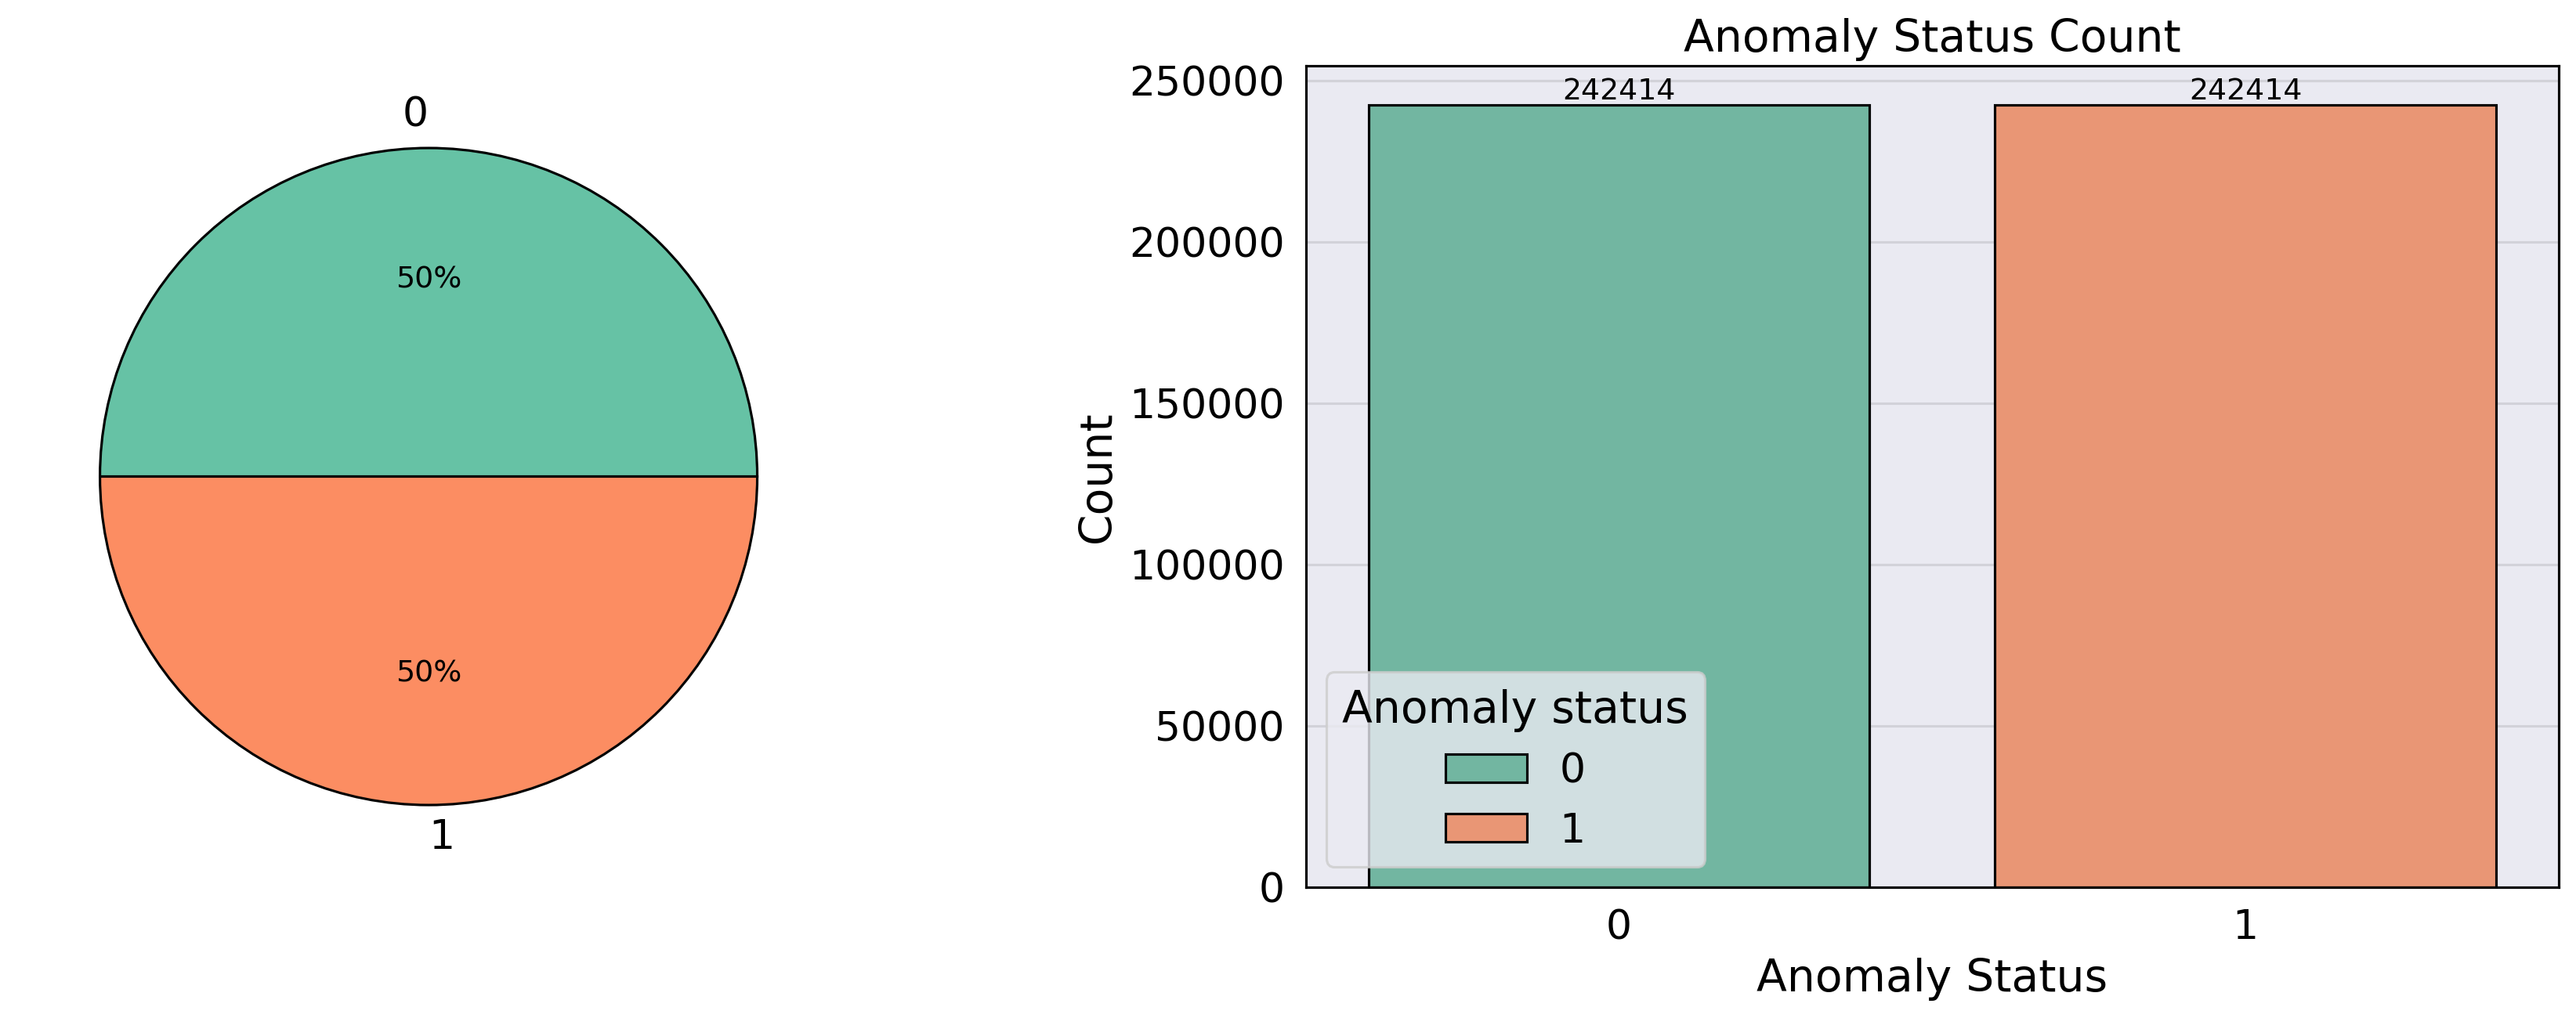

In [ ]:
# Separar características y target
X = prepared_df.drop("Anomaly status", axis=1)
y = prepared_df["Anomaly status"]

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Crear DataFrame balanceado
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["Anomaly status"] = y_res

# Verificar proporciones de clases
print(balanced_df["Anomaly status"].value_counts(normalize=True))

labels = balanced_df['Anomaly status'].unique()
dist = (balanced_df['Anomaly status'].value_counts()).to_numpy()

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(dist, labels = labels, autopct='%1.0f%%')
plt.subplot(1, 2, 2)
ax = sns.countplot(x = 'Anomaly status', hue = 'Anomaly status', data = balanced_df)

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Anomaly Status')
plt.ylabel('Count')
plt.title("Anomaly Status Count")
plt.show()

balanced_df.to_csv("Cloud_Anomaly_Dataset_Balanced.csv", index=False)

Quedando completamente balanceado el dataset para las clases 0 y 1 en `Anomaly status` con un total de **484,828** registros de ejemplos, **242,414** por clase.

**3.7. Seleccionar características**

Finalmente, en la última acción de nuestro flujo de preparación de los datos previo a experimentar con los diferentes modelos de machine learning supervisado para la correcta clasificación binaria y con el objetivo de determinar si la reducción de dimensionalidad mediante PCA o LLE resulta apropiada para nuestro dataset de detección de anomalías en máquinas virtuales, llevaremos a cabo un análisis exhaustivo de correlación y dependencia entre variables, e igualmente, en la selección de caracteristicas evaluando modelos para determinar si hay mejoras para selección de features es ideal para este caso.

Partamos evaluando simultáneamente relaciones lineales con correlación de Pearson, relaciones monótonas no lineales con correlación de Spearman, redundancias fuertes con correlaciones mayores a 0.7 y dependencia directa entre cada característica y el valor objetivo con Mutual Information. Dado que el dataset contiene una mezcla de métricas operativas continuas y variables categóricas codificadas como one-hot, esperamos que este análisis caracterice rigurosamente la estructura interna de los datos y determinar si existía suficiente colinealidad o patrones compartidos que justificaran la aplicación de PCA o LLE.

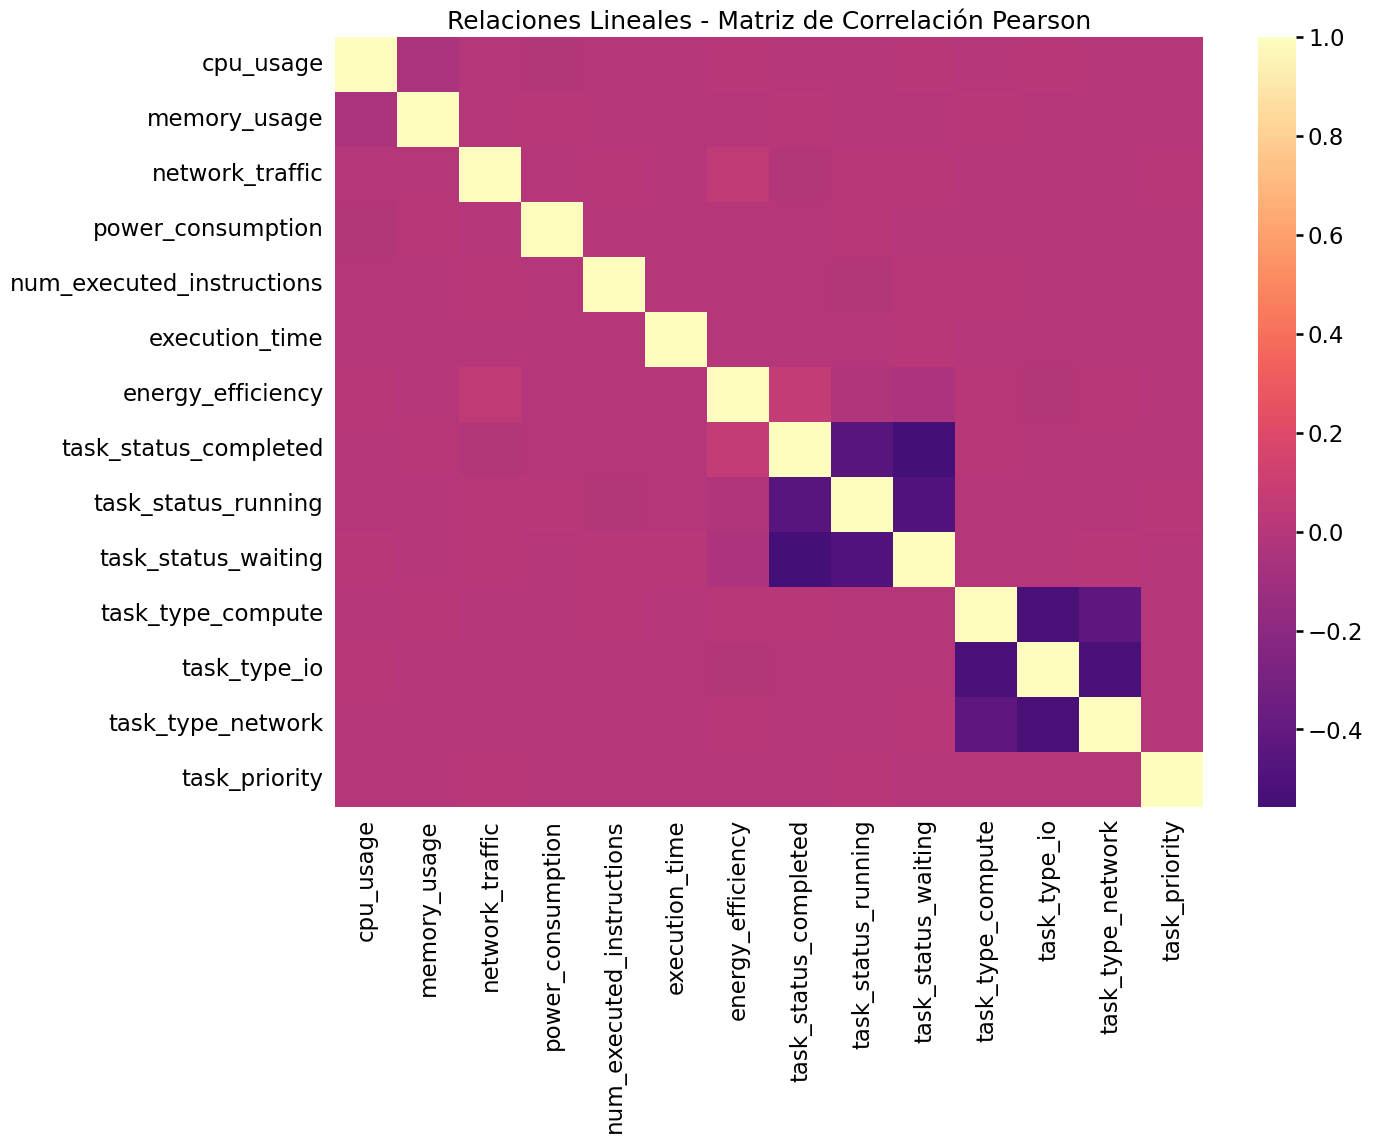


Top correlaciones Pearson absolutas:
task_status_completed  task_status_waiting      0.555729
task_status_waiting    task_status_completed    0.555729
task_type_io           task_type_network        0.535184
task_type_network      task_type_io             0.535184
task_type_io           task_type_compute        0.532282
task_type_compute      task_type_io             0.532282
task_status_running    task_status_waiting      0.489815
task_status_waiting    task_status_running      0.489815
task_status_running    task_status_completed    0.452601
task_status_completed  task_status_running      0.452601
task_type_network      task_type_compute        0.430257
task_type_compute      task_type_network        0.430257
energy_efficiency      task_status_completed    0.065985
task_status_completed  energy_efficiency        0.065985
energy_efficiency      network_traffic          0.052491
network_traffic        energy_efficiency        0.052491
cpu_usage              memory_usage             0.

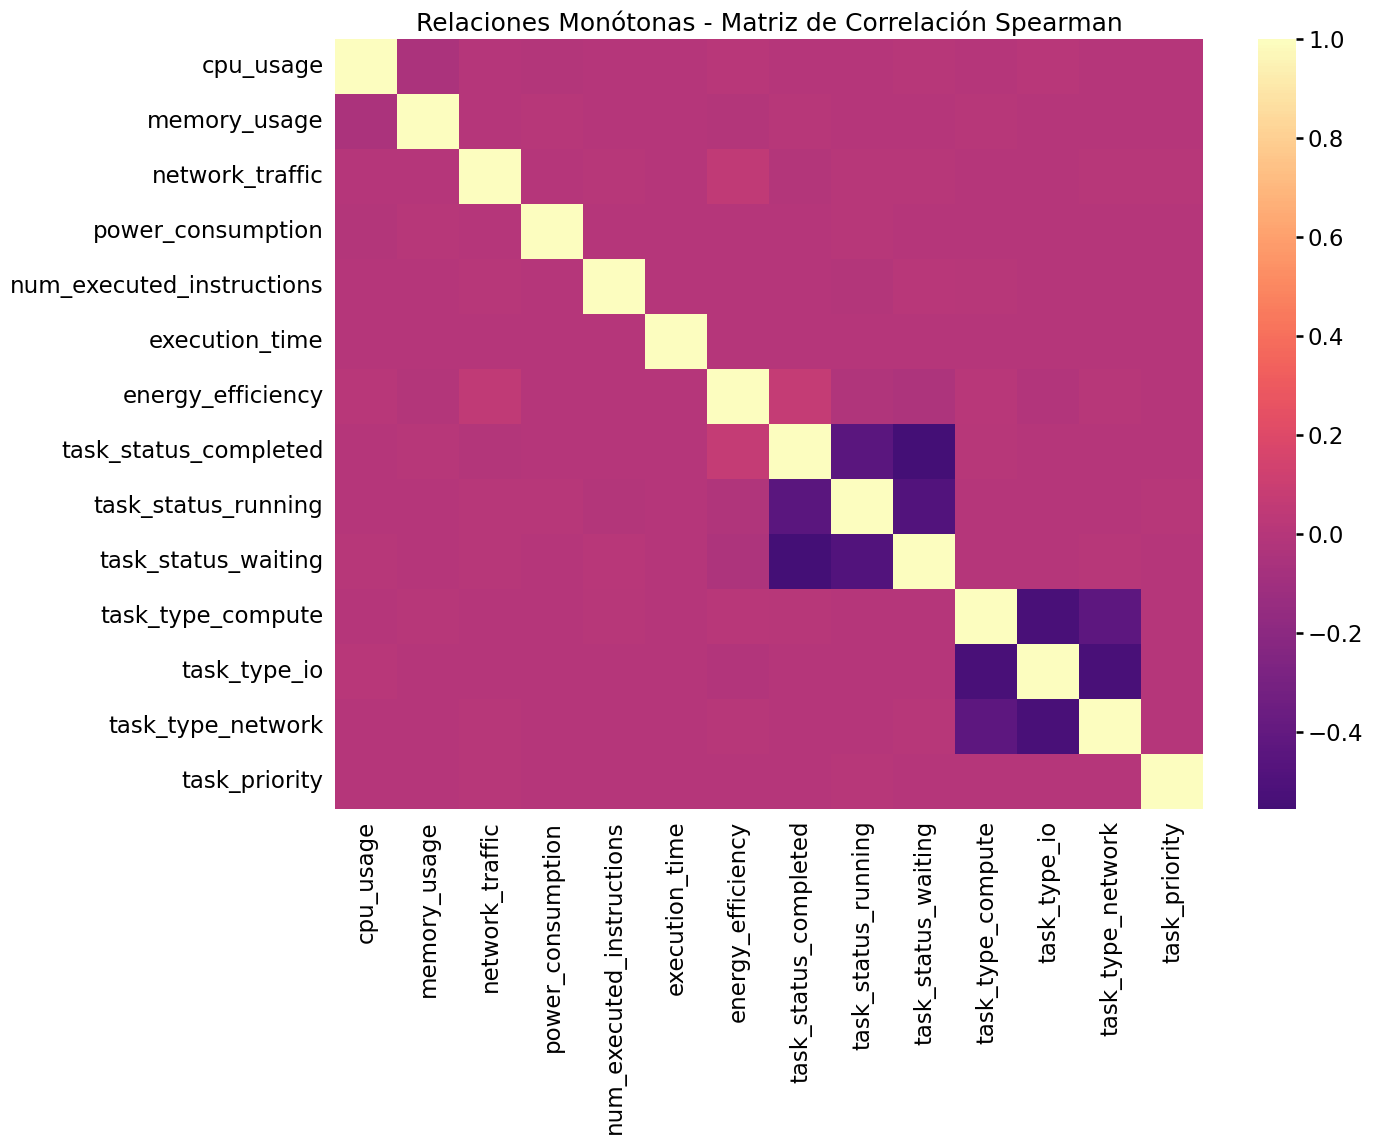


Top correlaciones Spearman absolutas:
task_status_completed  task_status_waiting      0.555512
task_status_waiting    task_status_completed    0.555512
task_type_io           task_type_network        0.534505
task_type_network      task_type_io             0.534505
task_type_io           task_type_compute        0.531553
task_type_compute      task_type_io             0.531553
task_status_running    task_status_waiting      0.488449
task_status_waiting    task_status_running      0.488449
task_status_running    task_status_completed    0.450694
task_status_completed  task_status_running      0.450694
task_type_network      task_type_compute        0.427993
task_type_compute      task_type_network        0.427993
energy_efficiency      task_status_completed    0.069057
task_status_completed  energy_efficiency        0.069057
energy_efficiency      network_traffic          0.056317
network_traffic        energy_efficiency        0.056317
cpu_usage              memory_usage             0

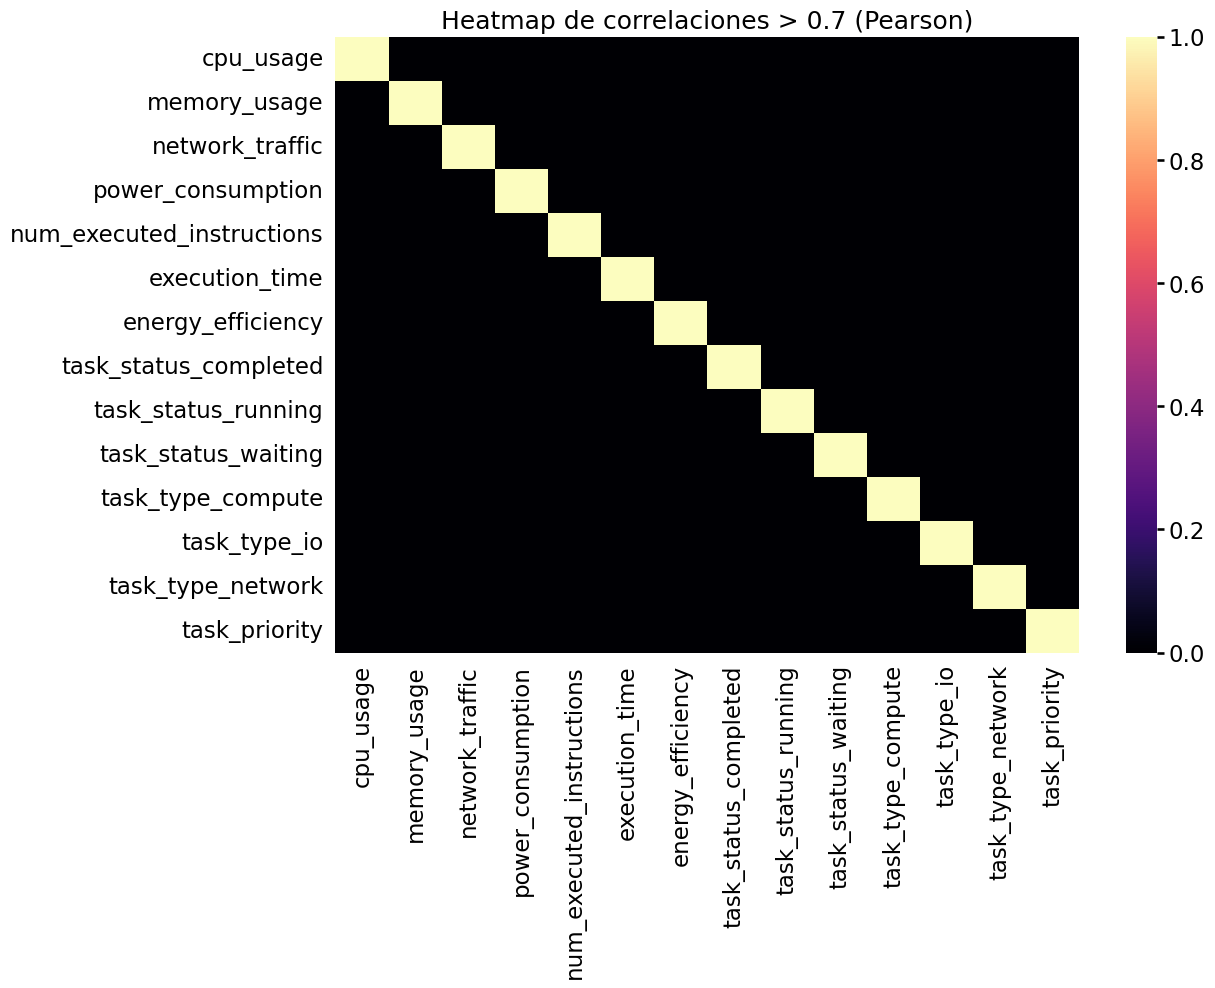


Pares de variables con correlación > 0.7 (posibles redundancias):

Series([], dtype: float64)


C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_23916\1329587990.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette="viridis")


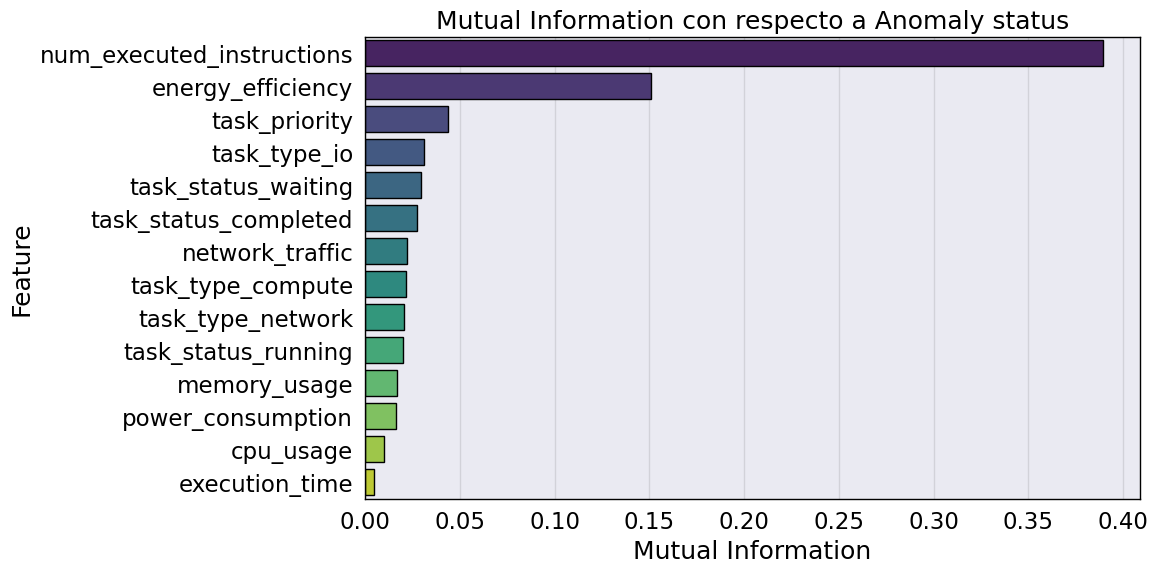


Mutual Information (de mayor a menor):
num_executed_instructions    0.389451
energy_efficiency            0.151046
task_priority                0.043979
task_type_io                 0.031035
task_status_waiting          0.029386
task_status_completed        0.027270
network_traffic              0.022308
task_type_compute            0.021774
task_type_network            0.020792
task_status_running          0.020230
memory_usage                 0.016677
power_consumption            0.016429
cpu_usage                    0.010093
execution_time               0.004828
dtype: float64


In [170]:
TARGET = "Anomaly status"

# Separa features numéricas
num_features = balanced_df.drop(columns=[TARGET]).select_dtypes(include=[np.number]).columns.tolist()

# Correlación Pearson (Lineal)
plt.figure(figsize=(14, 10))
corr_pearson = balanced_df[num_features].corr(method="pearson")
sns.heatmap(corr_pearson, cmap="magma", center=0, annot=False)
plt.title("Relaciones Lineales - Matriz de Correlación Pearson")
plt.show()

# Mostrar top correlaciones absolutas
corr_pairs = corr_pearson.abs().unstack().sort_values(ascending=False)
print("\nTop correlaciones Pearson absolutas:")
print(corr_pairs[corr_pairs < 1.0].head(20))


# Correlación Spearman (Monótona)
plt.figure(figsize=(14, 10))
corr_spearman = balanced_df[num_features].corr(method="spearman")
sns.heatmap(corr_spearman, cmap="magma", center=0, annot=False)
plt.title("Relaciones Monótonas - Matriz de Correlación Spearman")
plt.show()

corr_pairs_spear = corr_spearman.abs().unstack().sort_values(ascending=False)
print("\nTop correlaciones Spearman absolutas:")
print(corr_pairs_spear[corr_pairs_spear < 1.0].head(20))


# Mapa de Calor de Correlación > 0.7
threshold = 0.7
high_corr = corr_pearson.abs() > threshold

plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, cmap="magma", annot=False)
plt.title(f"Heatmap de correlaciones > {threshold} (Pearson)")
plt.show()

print("\nPares de variables con correlación > 0.7 (posibles redundancias):\n")
high_corr_pairs = corr_pearson.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[(high_corr_pairs < 1.0) & (high_corr_pairs > threshold)]
print(high_corr_pairs)


# Mutual Information (Dependencia no lineal)
X = balanced_df[num_features]
y = balanced_df[TARGET]

mi = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi, index=num_features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=mi_series.values, y=mi_series.index, palette="viridis")
plt.title("Mutual Information con respecto a Anomaly status")
plt.xlabel("Mutual Information")
plt.ylabel("Feature")
plt.show()

print("\nMutual Information (de mayor a menor):")
print(mi_series)

Con esta evaluación podemos observar de forma consistente que PCA no es adecuado para este dataset. Las correlaciones Pearson y Spearman mostraron que no existen relaciones lineales o monótonas fuertes entre las variables continuas, y las pocas correlaciones elevadas observadas se limitaron exclusivamente a interacciones esperadas entre variables one-hot codificadas, lo cual no constituye redundancia aprovechable para PCA. Además, no se identificó ningún par de variables con correlación superior a 0.7, confirmando la ausencia de colinealidad significativa. Por otra parte, LLE tampoco resulta apropiado, ya que no se observan estructuras no lineales locales ni manifolds subyacentes que justifiquen su uso, y su elevada sensibilidad al ruido, junto con su alto costo computacional en datasets grandes como este, lo vuelven poco práctico y potencialmente perjudicial para la tarea.

Adicionalmente, la Mutual Information reveló que solo un pequeño subconjunto de características principalmente `num_executed_instructions` y `energy_efficiency` que aportan señales relevantes para la clasificación, mientras que la mayoría proporciona información con menos poder predicto. Esto sugiere que una estrategia basada en selección de características es más apropiada, ya que permite preservar la información predictiva esencial sin introducir las distorsiones y pérdida de señal que provocaría la aplicación de PCA.

Ahora procederemos a evaluar selecciones de caracteristicas.

In [172]:
# Separar X e y
X = balanced_df.drop(columns=['Anomaly status'])
y = balanced_df['Anomaly status']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Evaluamos por un método embebido con Random Forest Feature Importance + SelectFromModel que usa un modelo que aprende la importancia de las features durante el entrenamiento.

===== [EMBEDDED] Resultados con todas las características =====
Accuracy: 0.9101747004104531
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     48483
           1       0.86      0.97      0.92     48483

    accuracy                           0.91     96966
   macro avg       0.92      0.91      0.91     96966
weighted avg       0.92      0.91      0.91     96966



C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_23916\2617923716.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feat_importances, palette='viridis')


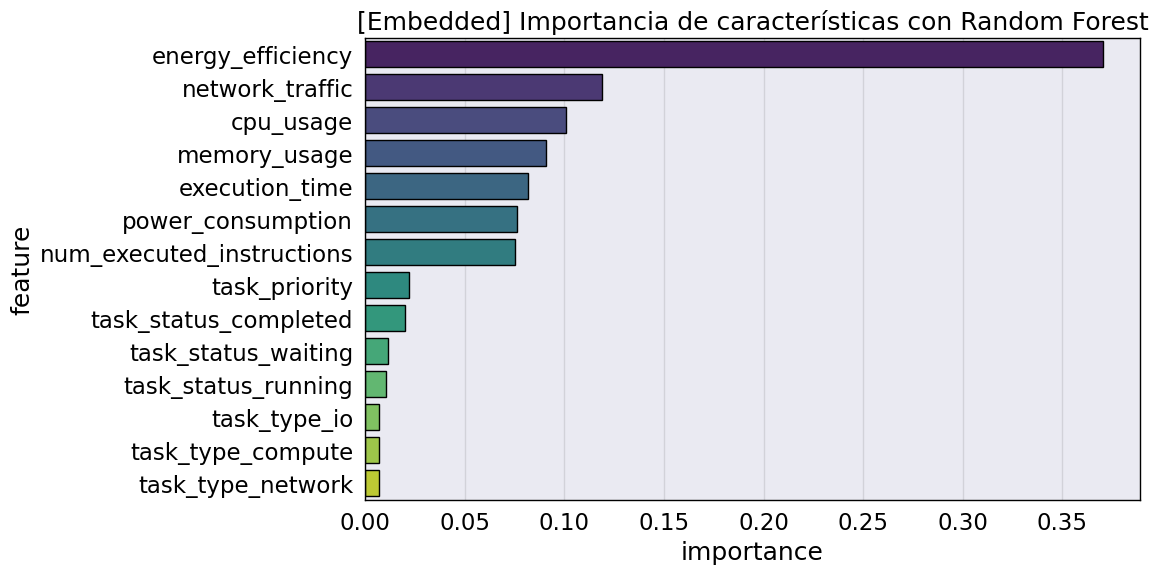

c:\Users\ESTUDIANTE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\ESTUDIANTE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



[EMBEDDED] Características seleccionadas:
Index(['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption',
       'num_executed_instructions', 'execution_time', 'energy_efficiency'],
      dtype='object')

===== [EMBEDDED] Resultados con características seleccionadas =====
Accuracy: 0.8761937173854754
              precision    recall  f1-score   support

           0       0.93      0.81      0.87     48483
           1       0.83      0.94      0.88     48483

    accuracy                           0.88     96966
   macro avg       0.88      0.88      0.88     96966
weighted avg       0.88      0.88      0.88     96966



In [173]:
# Entrenar modelo con TODAS las características (Embedded)
rf_all = RandomForestClassifier(n_estimators=100, random_state=42)
rf_all.fit(X_train, y_train)
y_pred_all = rf_all.predict(X_test)

# Evaluación
print("===== [EMBEDDED] Resultados con todas las características =====")
print("Accuracy:", accuracy_score(y_test, y_pred_all))
print(classification_report(y_test, y_pred_all))

# Importancia de características
importances = rf_all.feature_importances_
feature_names = X.columns
feat_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_importances, palette='viridis')
plt.title('[Embedded] Importancia de características con Random Forest')
plt.show()

# Selección automática con SelectFromModel
selector = SelectFromModel(rf_all, prefit=True, threshold='median')
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
selected_features = feature_names[selector.get_support()]

print("\n[EMBEDDED] Características seleccionadas:")
print(selected_features)

# Entrenar modelo con características seleccionadas
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

y_pred_selected = rf_selected.predict(X_test_selected)

print("\n===== [EMBEDDED] Resultados con características seleccionadas =====")
print("Accuracy:", accuracy_score(y_test, y_pred_selected))
print(classification_report(y_test, y_pred_selected))

Ahora evaluemos por un Método de Filtro con Mutual Information que evalúa la dependencia entre cada feature y el target.

===== [FILTER] Mutual Information Scores =====
                      feature  MI_score
4   num_executed_instructions  0.378629
6           energy_efficiency  0.151000
13              task_priority  0.039760
11               task_type_io  0.026351
9         task_status_waiting  0.025620
7       task_status_completed  0.024447
2             network_traffic  0.022292
10          task_type_compute  0.018629
12          task_type_network  0.018084
3           power_consumption  0.017584
8         task_status_running  0.017083
1                memory_usage  0.016717
0                   cpu_usage  0.009518
5              execution_time  0.004714


C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_23916\1530972307.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MI_score', y='feature', data=mi_df, palette='viridis')


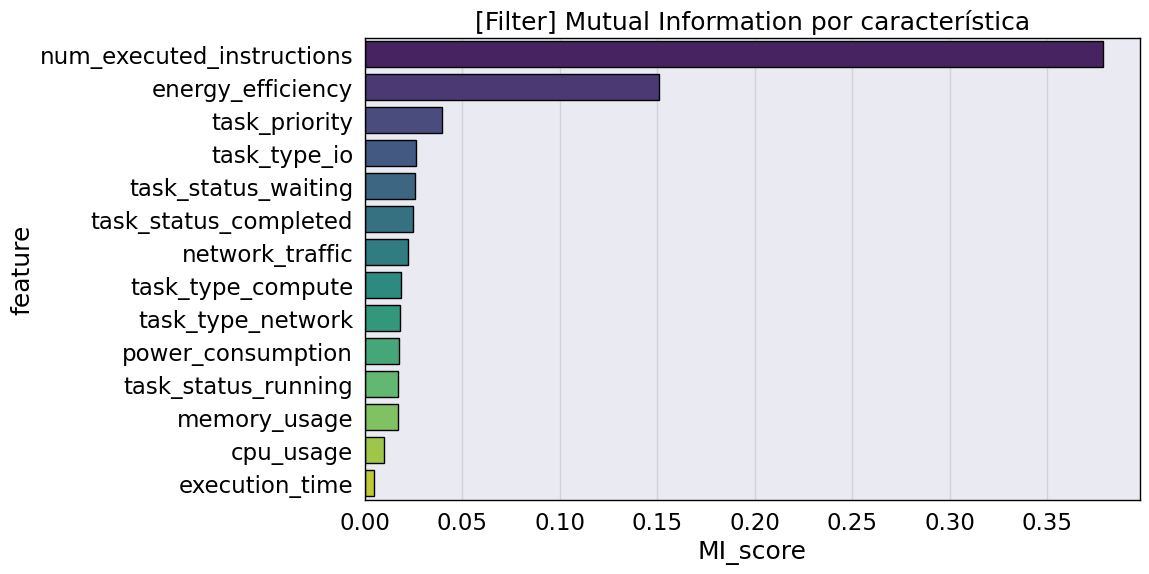


[FILTER] Características seleccionadas por MI (umbral=0.02):
['num_executed_instructions', 'energy_efficiency', 'task_priority', 'task_type_io', 'task_status_waiting', 'task_status_completed', 'network_traffic']

===== [FILTER] Resultados con características seleccionadas por MI =====
Accuracy: 0.8359734339871707
              precision    recall  f1-score   support

           0       0.88      0.78      0.83     48483
           1       0.80      0.89      0.84     48483

    accuracy                           0.84     96966
   macro avg       0.84      0.84      0.84     96966
weighted avg       0.84      0.84      0.84     96966



In [174]:
# Calcular Mutual Information
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)

mi_df = pd.DataFrame({
    'feature': X.columns,
    'MI_score': mi_scores
}).sort_values(by='MI_score', ascending=False)

print("===== [FILTER] Mutual Information Scores =====")
print(mi_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='MI_score', y='feature', data=mi_df, palette='viridis')
plt.title("[Filter] Mutual Information por característica")
plt.show()

# Selección usando umbral fijo
threshold = 0.02
selected_features_mi = mi_df[mi_df['MI_score'] > threshold]['feature'].tolist()

print("\n[FILTER] Características seleccionadas por MI (umbral=0.02):")
print(selected_features_mi)

X_train_mi = X_train[selected_features_mi]
X_test_mi = X_test[selected_features_mi]

# Entrenar modelo con características seleccionadas por MI
rf_mi = RandomForestClassifier(n_estimators=100, random_state=42)
rf_mi.fit(X_train_mi, y_train)

y_pred_mi = rf_mi.predict(X_test_mi)

print("\n===== [FILTER] Resultados con características seleccionadas por MI =====")
print("Accuracy:", accuracy_score(y_test, y_pred_mi))
print(classification_report(y_test, y_pred_mi))

Continuemos con un método wreapped con Recursive Feature Elimination (RFE) que usa un modelo iterativo que elimina y evalúa.

In [176]:
# Modelo base
rf_rfe = RandomForestClassifier(n_estimators=100, random_state=42)

# Elegimos cuántas características queremos mantener
n_features_to_select = 8

rfe = RFE(estimator=rf_rfe, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

selected_features_rfe = X.columns[rfe.support_]

print("\n[WRAPPED] Características seleccionadas por RFE:")
print(selected_features_rfe)

# Reducir dataset
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Entrenar modelo con features RFE
rf_rfe_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_rfe_final.fit(X_train_rfe, y_train)

y_pred_rfe = rf_rfe_final.predict(X_test_rfe)

print("\n===== [WRAPPED] Resultados con características seleccionadas por RFE =====")
print("Accuracy:", accuracy_score(y_test, y_pred_rfe))
print(classification_report(y_test, y_pred_rfe))


[WRAPPED] Características seleccionadas por RFE:
Index(['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption',
       'num_executed_instructions', 'execution_time', 'energy_efficiency',
       'task_status_completed'],
      dtype='object')

===== [WRAPPED] Resultados con características seleccionadas por RFE =====
Accuracy: 0.8866613039622135
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     48483
           1       0.83      0.97      0.89     48483

    accuracy                           0.89     96966
   macro avg       0.90      0.89      0.89     96966
weighted avg       0.90      0.89      0.89     96966



Evaluemos con el método filtro de Chi-Square que mide dependencia entre variables categóricas y la variable objetivo.

===== [FILTER] Chi-Square Scores =====
                      feature    chi2_score        p_value
6           energy_efficiency  15498.979390   0.000000e+00
7       task_status_completed   1696.440080   0.000000e+00
8         task_status_running    617.160994  3.099081e-136
2             network_traffic    357.383856   1.045316e-79
9         task_status_waiting    307.201665   8.888571e-69
11               task_type_io     59.586490   1.170359e-14
10          task_type_compute     21.788273   3.044554e-06
12          task_type_network     17.737069   2.536356e-05
13              task_priority      9.927572   1.628211e-03
4   num_executed_instructions      4.045043   4.430124e-02
1                memory_usage      3.497524   6.146065e-02
0                   cpu_usage      2.206632   1.374184e-01
5              execution_time      0.138581   7.096961e-01
3           power_consumption      0.065528   7.979630e-01


C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_23916\2337669684.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='chi2_score', y='feature', data=chi_df, palette='viridis')


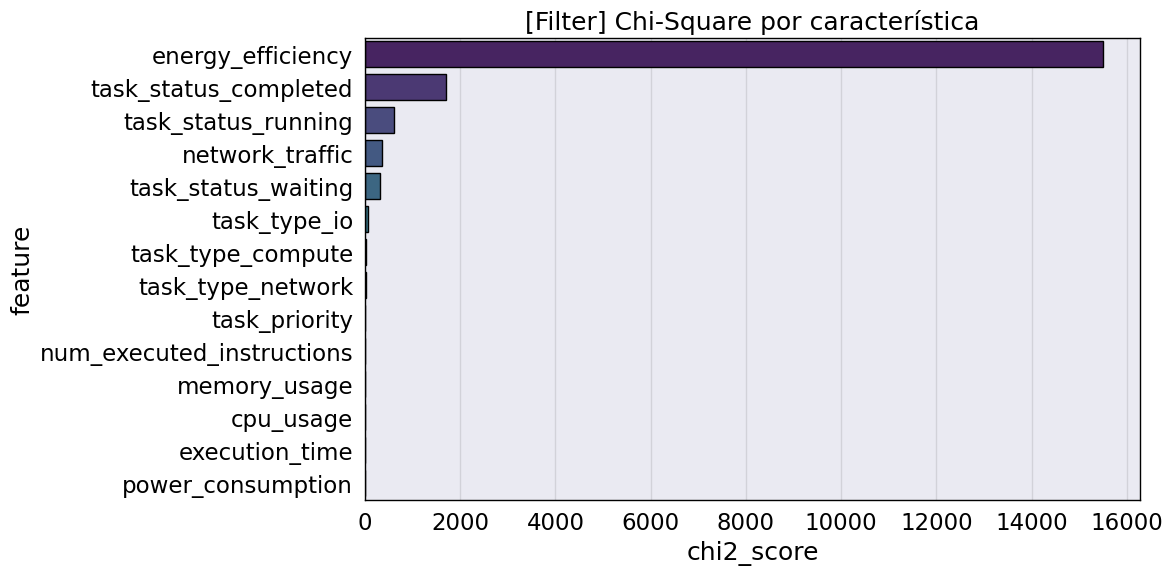


[FILTER] Características seleccionadas por Chi-Square:
Index(['network_traffic', 'energy_efficiency', 'task_status_completed',
       'task_status_running', 'task_status_waiting', 'task_type_compute',
       'task_type_io', 'task_type_network'],
      dtype='object')

===== [FILTER] Resultados con Chi-Square Features =====
Accuracy: 0.7762102180145618
              precision    recall  f1-score   support

           0       0.80      0.73      0.77     48483
           1       0.75      0.82      0.79     48483

    accuracy                           0.78     96966
   macro avg       0.78      0.78      0.78     96966
weighted avg       0.78      0.78      0.78     96966



In [178]:
# Escalar valores a rango positivo [0,1] requerido por Chi2
scaler_chi = MinMaxScaler()
X_train_chi = scaler_chi.fit_transform(X_train)
X_test_chi = scaler_chi.transform(X_test)

# Calcular chi-square
chi_scores, p_values = chi2(X_train_chi, y_train)

chi_df = pd.DataFrame({
    'feature': X.columns,
    'chi2_score': chi_scores,
    'p_value': p_values
}).sort_values(by='chi2_score', ascending=False)

print("===== [FILTER] Chi-Square Scores =====")
print(chi_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='chi2_score', y='feature', data=chi_df, palette='viridis')
plt.title("[Filter] Chi-Square por característica")
plt.show()

# Seleccionar features basadas en Chi2
k = 8  # selecciona las mejores 8; puedes cambiarlo
selector_chi = SelectKBest(score_func=chi2, k=k)
selector_chi.fit(X_train_chi, y_train)

selected_features_chi = X.columns[selector_chi.get_support()]
print("\n[FILTER] Características seleccionadas por Chi-Square:")
print(selected_features_chi)

# Reducir dataset
X_train_chi_sel = selector_chi.transform(X_train_chi)
X_test_chi_sel = selector_chi.transform(X_test_chi)

# Entrenar modelo con features Chi-square
rf_chi = RandomForestClassifier(n_estimators=100, random_state=42)
rf_chi.fit(X_train_chi_sel, y_train)

y_pred_chi = rf_chi.predict(X_test_chi_sel)

print("\n===== [FILTER] Resultados con Chi-Square Features =====")
print("Accuracy:", accuracy_score(y_test, y_pred_chi))
print(classification_report(y_test, y_pred_chi))


Para finalizar la evaluación, analisemos otro método embebido con LASSO que elimina automáticamente variables asignándoles coeficiente 0, lo cual equivale a seleccionar características. Usaremos LogisticRegression con penalización L1.

===== [EMBEDDED] Coeficientes Lasso =====
                      feature      coef
6           energy_efficiency -1.098552
8         task_status_running -0.426827
9         task_status_waiting -0.368331
10          task_type_compute -0.354765
12          task_type_network -0.348027
11               task_type_io -0.298066
2             network_traffic  0.267568
7       task_status_completed  0.236563
1                memory_usage -0.031109
0                   cpu_usage  0.029303
13              task_priority -0.016992
4   num_executed_instructions  0.014120
3           power_consumption -0.004934
5              execution_time -0.000484


C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_23916\1950383387.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coef', y='feature', data=lasso_coef, palette='viridis')


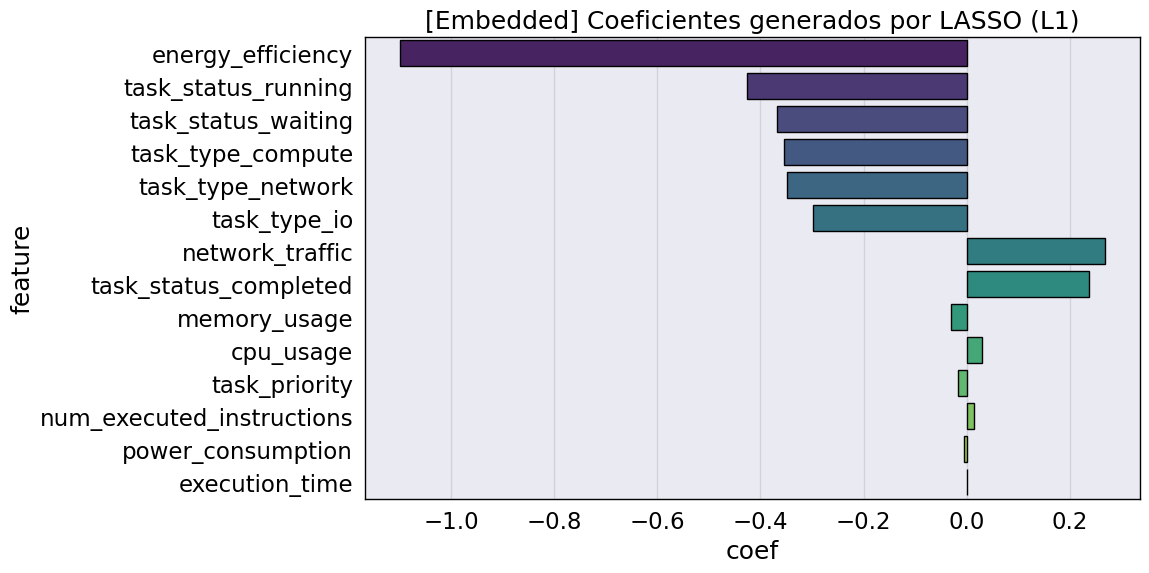


[EMBEDDED] Características seleccionadas por Lasso:
['energy_efficiency', 'task_status_running', 'task_status_waiting', 'task_type_compute', 'task_type_network', 'task_type_io', 'network_traffic', 'task_status_completed', 'memory_usage', 'cpu_usage', 'task_priority', 'num_executed_instructions', 'power_consumption', 'execution_time']

===== [EMBEDDED] Resultados con Lasso Features =====
Accuracy: 0.9108347255739125
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     48483
           1       0.86      0.97      0.92     48483

    accuracy                           0.91     96966
   macro avg       0.92      0.91      0.91     96966
weighted avg       0.92      0.91      0.91     96966



In [179]:
lasso = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    random_state=42,
    max_iter=500
)

lasso.fit(X_train, y_train)

# Coeficientes
lasso_coef = pd.DataFrame({
    'feature': X.columns,
    'coef': lasso.coef_[0]
}).sort_values(by='coef', key=lambda x: abs(x), ascending=False)

print("===== [EMBEDDED] Coeficientes Lasso =====")
print(lasso_coef)

plt.figure(figsize=(10, 6))
sns.barplot(x='coef', y='feature', data=lasso_coef, palette='viridis')
plt.title("[Embedded] Coeficientes generados por LASSO (L1)")
plt.show()

# Seleccionar features donde coef != 0
selected_features_lasso = lasso_coef[lasso_coef['coef'] != 0]['feature'].tolist()
print("\n[EMBEDDED] Características seleccionadas por Lasso:")
print(selected_features_lasso)

# Reducir dataset
X_train_lasso = X_train[selected_features_lasso]
X_test_lasso = X_test[selected_features_lasso]

# Entrenar modelo con features seleccionadas por Lasso
rf_lasso = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lasso.fit(X_train_lasso, y_train)

y_pred_lasso = rf_lasso.predict(X_test_lasso)

print("\n===== [EMBEDDED] Resultados con Lasso Features =====")
print("Accuracy:", accuracy_score(y_test, y_pred_lasso))
print(classification_report(y_test, y_pred_lasso))

Para concluir con la selección de las caracteríticas analisemos todos los resultados obtenidos.

===== Ranking Consolidado de Importancia de Features =====
                      feature  votes
1           energy_efficiency      5
6             network_traffic      5
5       task_status_completed      4
0   num_executed_instructions      4
4         task_status_waiting      3
3                task_type_io      3
13             execution_time      3
12          power_consumption      3
11               memory_usage      3
10                  cpu_usage      3
2               task_priority      2
9           task_type_network      2
7         task_status_running      2
8           task_type_compute      2


C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_23916\700823141.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='votes', y='feature', data=ranking_df, palette='viridis')


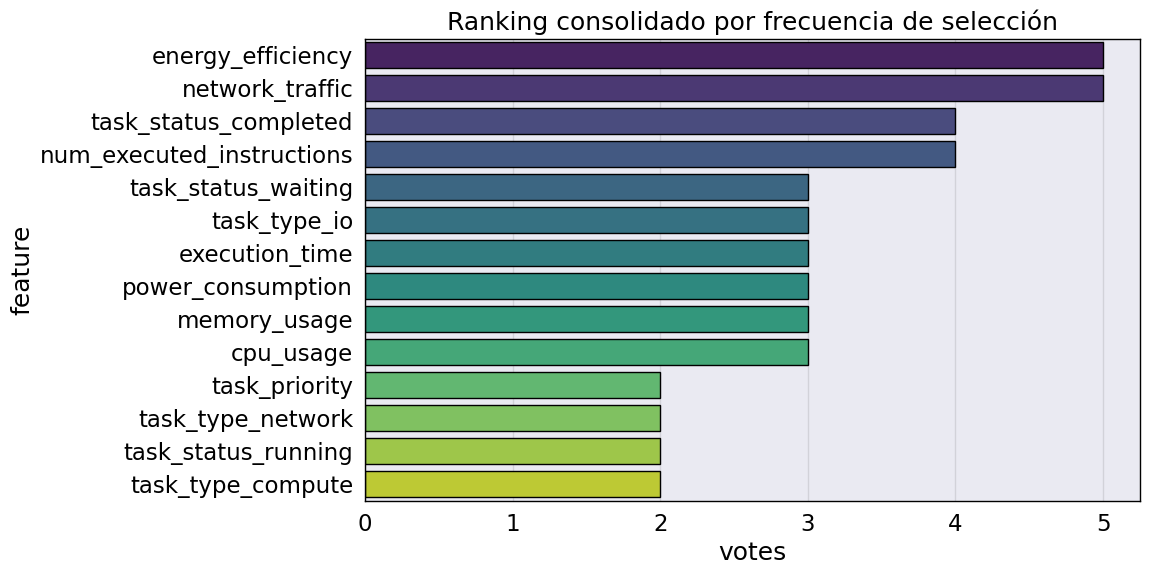

In [ ]:
# Convertimos cada conjunto de features a lista
all_selected_lists = [
    selected_features_mi,
    list(selected_features_chi),
    list(selected_features_rfe),
    list(selected_features),
    selected_features_lasso
]

# Aplanar listas
all_features_selected = [feat for lst in all_selected_lists for feat in lst]

# Contar frecuencia por feature
ranking = Counter(all_features_selected)

ranking_df = pd.DataFrame({
    'feature': list(ranking.keys()),
    'votes': list(ranking.values())
}).sort_values(by='votes', ascending=False)

print("===== Ranking Consolidado de Importancia de Features =====")
print(ranking_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='votes', y='feature', data=ranking_df, palette='viridis')
plt.title("Ranking consolidado por frecuencia de selección")
plt.show()

===== Comparación de Métodos =====
              accuracy  precision    recall        f1
All Features  0.910175   0.863589  0.974238  0.915583
MI            0.835973   0.801002  0.894066  0.844979
Chi-Square    0.776210   0.754461  0.818947  0.785382
RFE           0.886661   0.833918  0.965637  0.894957
RF Embedded   0.876194   0.833974  0.939401  0.883554
Lasso         0.910835   0.864387  0.974568  0.916177


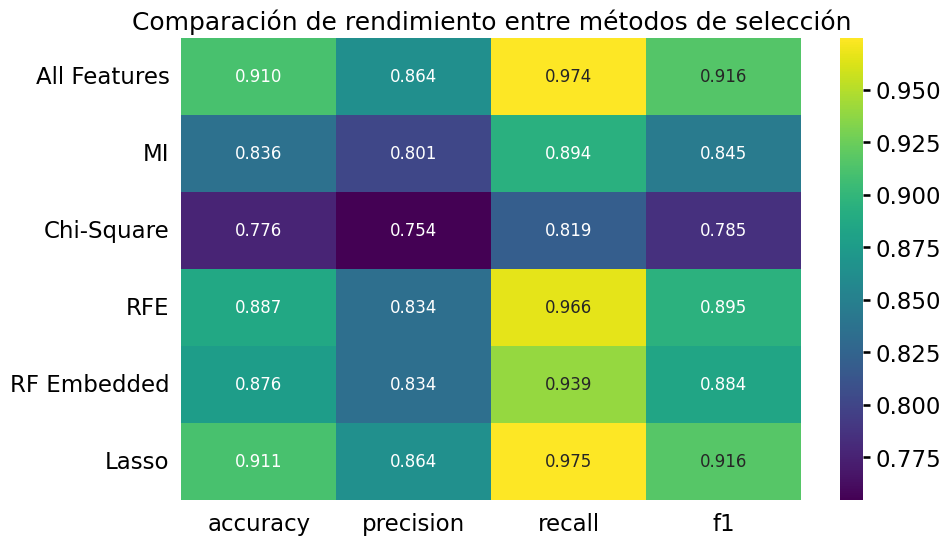

In [181]:
def get_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }

results = {
    'All Features': get_metrics(y_test, y_pred_all),
    'MI': get_metrics(y_test, y_pred_mi),
    'Chi-Square': get_metrics(y_test, y_pred_chi),
    'RFE': get_metrics(y_test, y_pred_rfe),
    'RF Embedded': get_metrics(y_test, y_pred_selected),
    'Lasso': get_metrics(y_test, y_pred_lasso)
}

results_df = pd.DataFrame(results).T
print("===== Comparación de Métodos =====")
print(results_df)

plt.figure(figsize=(10,6))
sns.heatmap(results_df, annot=True, cmap='viridis', fmt=".3f")
plt.title("Comparación de rendimiento entre métodos de selección")
plt.show()

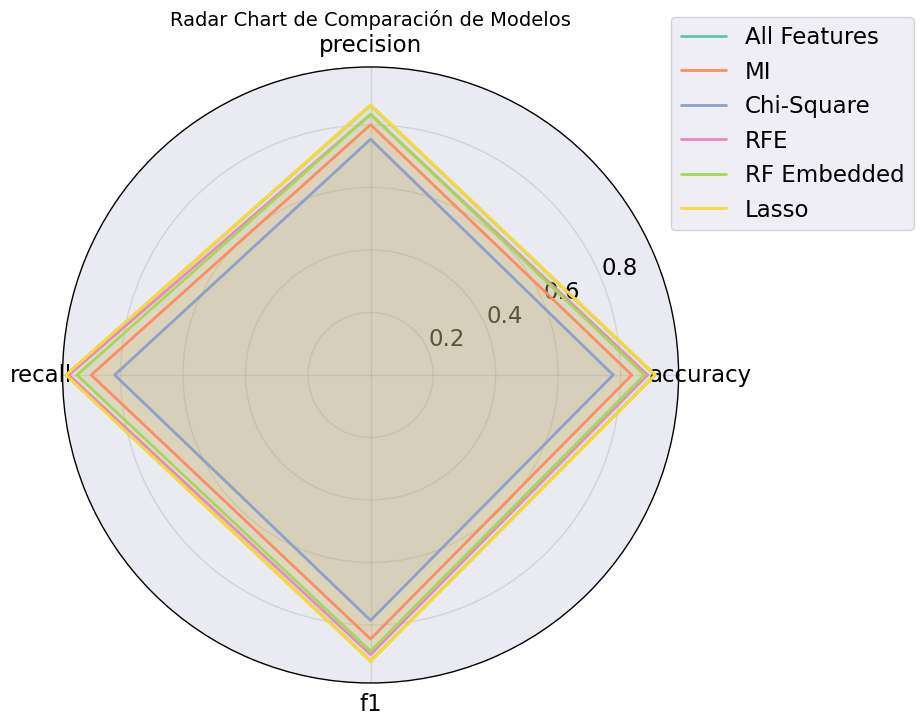

In [182]:
metrics = ['accuracy', 'precision', 'recall', 'f1']
methods = list(results_df.index)

angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for method in methods:
    values = results_df.loc[method].values
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, linewidth=2, label=method)
    ax.fill(angles, values, alpha=0.1)

ax.set_thetagrids(angles[:-1] * 180 / np.pi, metrics)
ax.set_title("Radar Chart de Comparación de Modelos", fontsize=14)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1.1))
plt.show()


Al revisar todos los resultados de los métodos Filter, Wrapper y Embedded, observamos que el modelo entrenado con todas las características sigue siendo el que logra el mejor desempeño general, alcanzando un accuracy cercano a 0.910. Aunque aplicamos varias técnicas de reducción, ninguna mejoró el rendimiento, lo cual nos sugiere que prácticamente todas las variables aportan información valiosa para la predicción.

Cuando analizamos el enfoque Embedded con Random Forest, notamos que seleccionó principalmente características numéricas relacionadas con consumo, uso de recursos y rendimiento del sistema. Sin embargo, al entrenar el modelo solo con estas características, el accuracy disminuyó a 0.876, lo que nos hace concluir que algunas variables categóricas sí aportan valor, aunque no destaquen individualmente en importancia. Por otro lado, con Lasso vimos que, aunque redujo muy poco el conjunto de variables y mantuvo casi todas, el rendimiento se mantuvo prácticamente igual al modelo completo (0.9108), por lo que lo identificamos más como una técnica útil para interpretar, no para reducir.

En los métodos Filter, identificamos una caída considerable en el rendimiento. Mutual Information produjo un accuracy de 0.836, mientras que Chi-Square fue el que tuvo el desempeño más bajo con 0.776. Como grupo interpretamos que estos métodos, a pesar de ser rápidos y simples, no capturan adecuadamente las relaciones complejas entre variables del dataset, especialmente las interacciones entre valores numéricos y categóricos.

Con el método Wrapper (RFE) obtuvimos un desempeño más estable, con un accuracy de 0.886, mejor que los filtros pero aún sin alcanzar al modelo completo. Esto nos llevó a la conclusión conjunta de que el dataset tiene interacciones importantes entre características que se pierden cuando eliminamos algunas, incluso si individualmente parecen poco influyentes.

En general, coincidimos en que el dataset es bastante rico en información y que reducir características no mejora el desempeño; por el contrario, puede causar pérdidas importantes. Nuestro consenso es mantener todas las variables para el modelo final y considerar métodos más avanzados si quisiéramos explorar ingeniería de características. Además, concluimos que Lasso y RFE son los métodos más útiles para interpretación del modelo, mientras que Mutual Information y Chi-Square no resultan adecuados para este caso.

### 4. Experimentos y Ajuste de Hiperparámetros

En esta sección describimos los experimentos a realizar para ajustar los parámetros de los modelos de machine learning supervisado utilizando GridSearchCV.

In [185]:
X = balanced_df.drop(columns=["Anomaly status"])
y = balanced_df["Anomaly status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [186]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n===== Resultados: {name} =====")
    print("Accuracy:", acc)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R²:", r2)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión gráfica
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    return {
        "Modelo": name,
        "Accuracy": acc,
        "MSE": mse,
        "MAE": mae,
        "R2": r2
    }


In [203]:
param_grid_lr = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "saga"],
    "max_iter": [500, 1000]
}

grid_lr = GridSearchCV(
    LogisticRegression(),
    param_grid_lr,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

print("Mejores parámetros LR:", grid_lr.best_params_)

Mejores parámetros LR: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid_dt,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

print("Mejores parámetros DT:", grid_dt.best_params_)

Mejores parámetros DT: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(),
    param_grid_rf,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

print("Mejores parámetros RF:", grid_rf.best_params_)

Mejores parámetros RF: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [190]:
param_grid_mlp = {
    "hidden_layer_sizes": [(64,), (128,), (64,32), (128,64)],
    "activation": ["relu", "tanh"],
    "solver": ["adam", "lbfgs"],
    "alpha": [0.0001, 0.001],
    "max_iter": [300]
}

grid_mlp = GridSearchCV(
    MLPClassifier(),
    param_grid_mlp,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid_mlp.fit(X_train, y_train)
best_mlp = grid_mlp.best_estimator_

print("Mejores parámetros MLP:", grid_mlp.best_params_)


Mejores parámetros MLP: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64), 'max_iter': 300, 'solver': 'adam'}


### 5. Resultados de los Experimentos

Aa


===== Resultados: Regresión Logística =====
Accuracy: 0.73791844564074
MSE: 0.26208155435925995
MAE: 0.26208155435925995
R²: -0.0483262174370398

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72     48483
           1       0.71      0.80      0.75     48483

    accuracy                           0.74     96966
   macro avg       0.74      0.74      0.74     96966
weighted avg       0.74      0.74      0.74     96966



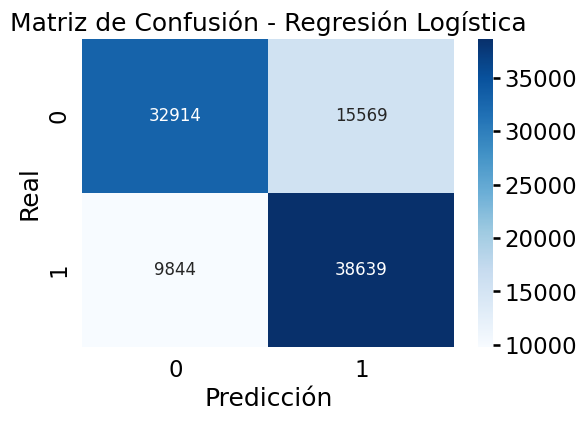


===== Resultados: Árbol de Decisión =====
Accuracy: 0.8355299795804715
MSE: 0.1644700204195285
MAE: 0.1644700204195285
R²: 0.34211991832188604

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.73      0.82     48483
           1       0.78      0.94      0.85     48483

    accuracy                           0.84     96966
   macro avg       0.85      0.84      0.83     96966
weighted avg       0.85      0.84      0.83     96966



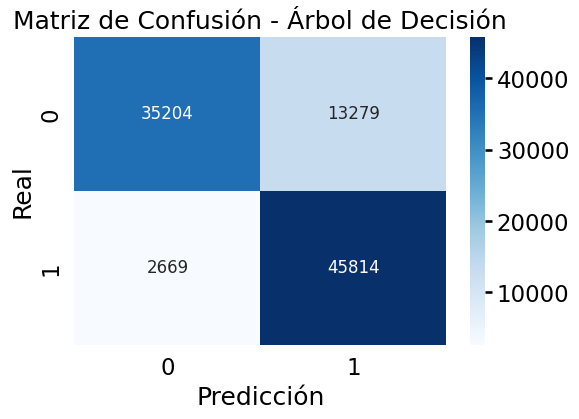


===== Resultados: Random Forest =====
Accuracy: 0.9113916218055813
MSE: 0.08860837819441866
MAE: 0.08860837819441866
R²: 0.6455664872223253

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     48483
           1       0.86      0.98      0.92     48483

    accuracy                           0.91     96966
   macro avg       0.92      0.91      0.91     96966
weighted avg       0.92      0.91      0.91     96966



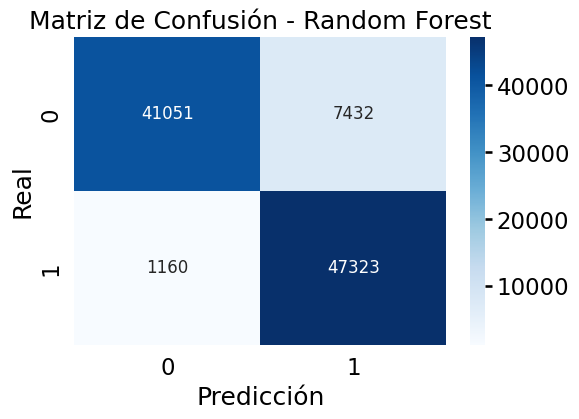


===== Resultados: MLP =====
Accuracy: 0.8534125363529484
MSE: 0.14658746364705155
MAE: 0.14658746364705155
R²: 0.4136501454117938

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.85     48483
           1       0.82      0.90      0.86     48483

    accuracy                           0.85     96966
   macro avg       0.86      0.85      0.85     96966
weighted avg       0.86      0.85      0.85     96966



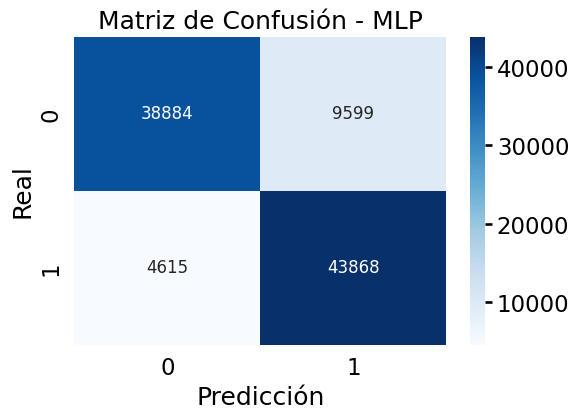

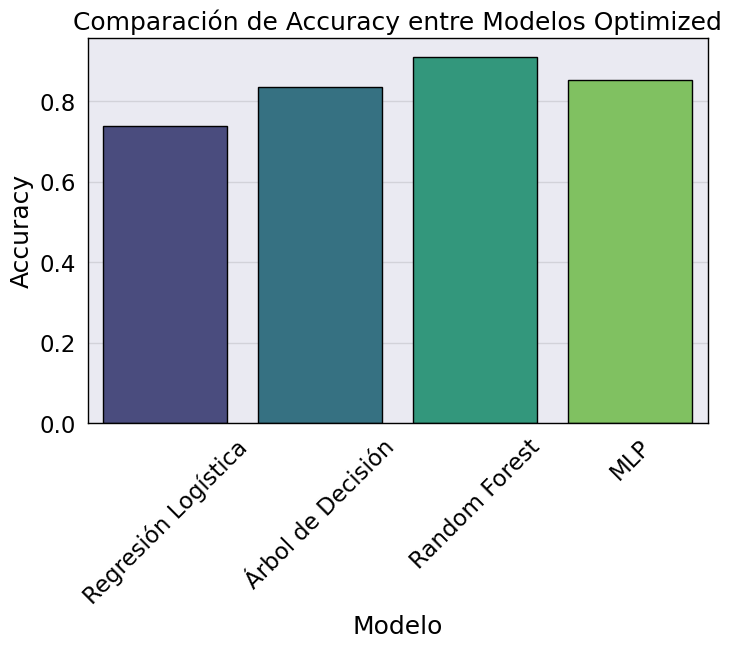

In [204]:
results = []

results.append(evaluate_model("Regresión Logística", best_lr, X_test, y_test))
results.append(evaluate_model("Árbol de Decisión", best_dt, X_test, y_test))
results.append(evaluate_model("Random Forest", best_rf, X_test, y_test))
results.append(evaluate_model("MLP", best_mlp, X_test, y_test))

df_results = pd.DataFrame(results)
df_results

plt.figure(figsize=(8,5))
sns.barplot(data=df_results, x="Modelo", y="Accuracy", palette="viridis")
plt.title("Comparación de Accuracy entre Modelos Optimized")
plt.xticks(rotation=45)
plt.show()

## III. Comparación de los modelos entrenados y conclusiones

### 6. Comparacion de los Métodos

Aa

### 7. Conclusiones

Aa

### 8. Recomendaciones

Aa

### 10. Referencias

[1] Peesara, S. (2025). *Cloud Infrastructure Anomaly Detection Data* [Dataset]. Kaggle.  
https://www.kaggle.com/datasets/sandhyapeesara/cloud-anomaly-data

[2] Chandola, V., Banerjee, A., & Kumar, V. (2009). *Anomaly Detection: A Survey*. ACM Computing Surveys, 41(3), 1-58.  
https://doi.org/10.1145/1541880.1541882

[3] He, H., & Garcia, E. (2009). *Learning from Imbalanced Data*. IEEE Transactions on Knowledge and Data Engineering, 21(9), 1263-1284.  
https://doi.org/10.1109/TKDE.2008.239

[4] Murthy, S. K., & Sarkar, S. (2022). *Cloud Resource Monitoring and Fault Detection Techniques: A Review*. Journal of Cloud Computing, 11(1).  
https://doi.org/10.1186/s13677-022-00301-9

### Anexos
En el directorio raíz en el que reposa este notebook de python, se adjunta el archivo del dataset en crudo descargado y descomprimido directamente desde el repositorio de Kaggle `Cloud_Anomaly_Dataset.csv`, y adicionalmente el conjunto de datos preparados para el entrenamiento de los modelos aquí implementados denominado `Cloud_Anomaly_Prepared.csv`.
